## Part 2: Exploratory Data Analysis (EDA) 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams
import seaborn as sns

%matplotlib inline

sns.set_style("darkgrid")
sns.set(rc={"figure.dpi":600, 'savefig.dpi':600})
params = {'axes.titlesize': 18.0, 
          'axes.labelsize': 16.0, 
          'legend.fontsize': 16.0,
          'xtick.labelsize': 12.0,        
          'ytick.labelsize': 12.0}
plt.rcParams.update(params)


****
## Offer Dataframe EDA
#### **Univariate Anaylsis**

Looking at single variables in the offer dataset.
**Channels**

In [2]:
offer = pd.read_csv('Cleaned_Offer.csv').drop('Unnamed: 0', axis = 1)
offer.head(3)

reward                              channels  difficulty  duration  \
0      10         ['email', 'mobile', 'social']          10         7   
1      10  ['web', 'email', 'mobile', 'social']          10         5   
2       0            ['web', 'email', 'mobile']           0         4   

      offer_type                                id offer_code  
0           bogo  ae264e3637204a6fb9bb56bc8210ddfd          A  
1           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0          A  
2  informational  3f207df678b143eea3cee63160fa8bed          C

In [3]:
channels = offer.value_counts('channels')
channels

channels
['web', 'email', 'mobile', 'social']    4
['web', 'email', 'mobile']              3
['email', 'mobile', 'social']           2
['web', 'email']                        1
dtype: int64

**Channels Observations:**  
A total of 10 promotion offers were sent to cusomter by 4 channels: websites, emails, mobile app and social media. Promotional effect of each channel can be extracted from comparisons between offers using different channels.
- 4 offers used all 4 of the channels. 
- 3 offers used all channels except for social media. 
- 2 offers used all channels except for websites. 
- 1 offer used only websites and emails. 

#### **Bivariate Anaylsis** 
Looking at how variables interact with one another in the offer dataset.

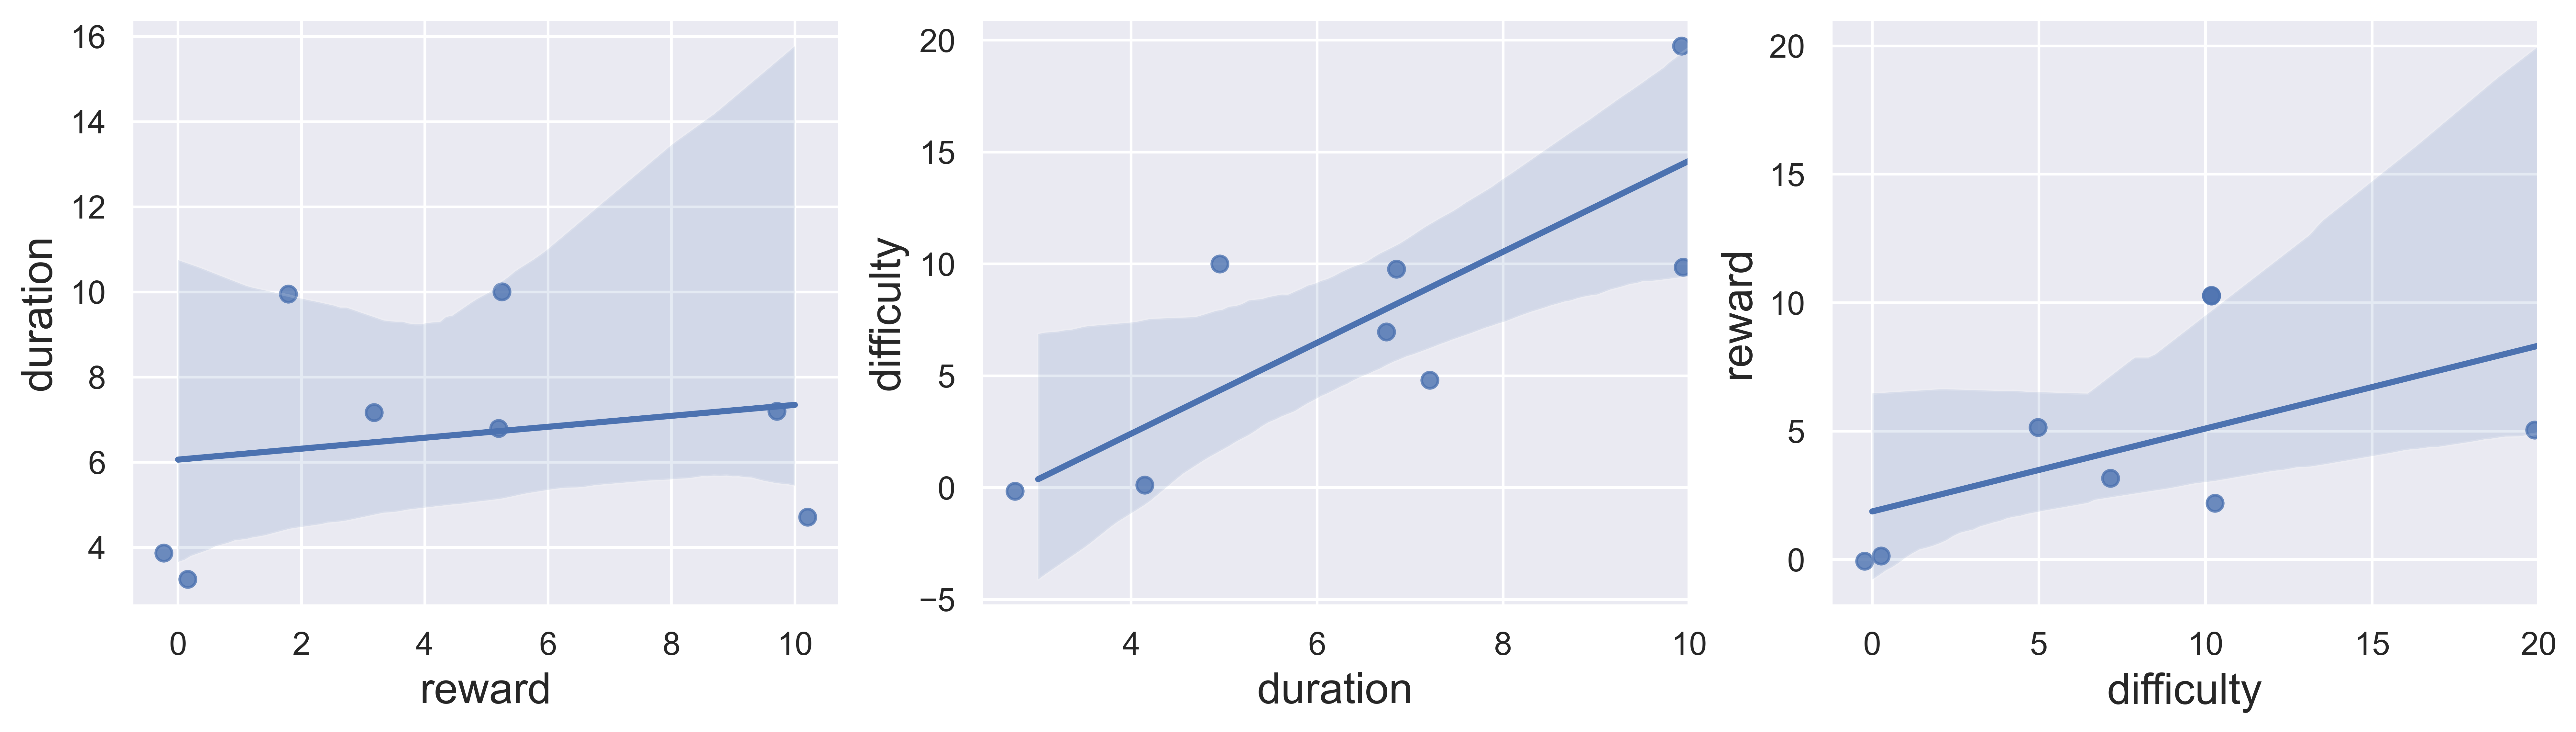

In [4]:
fig, axs = plt.subplots(1,3, figsize = (16,4))
sns.regplot(data = offer[0:8], x = 'reward', y ='duration', x_jitter = 0.3, y_jitter = 0.3, ax = axs[0])
sns.regplot(data = offer[0:8], x = 'duration', y ='difficulty', x_jitter = 0.3, y_jitter = 0.3, ax = axs[1])
sns.regplot(data = offer[0:8], x = 'difficulty', y ='reward', x_jitter = 0.3, y_jitter = 0.3, ax = axs[2])
plt.show()

**Reward, Duration, and Difficulty Observations:**
- There is a negative correlation between offer reward and duration.
- There is a positive correlation between offer dutation and difficulty.
- There is no obvious correlation between diffculty and reward. 

## Customer Dataframe EDA
#### **Univariate Anaylsis** 
**Age**

In [5]:
customer = pd.read_csv('Cleaned_Customer.csv').drop('Unnamed: 0', axis = 1)
customer.head(3)

gender  age                                id became_member_on    income  \
0      F   55  0610b486422d4921ae7d2bf64640c50b       2017-07-15  112000.0   
1      F   75  78afa995795e4d85b5d9ceeca43f5fef       2017-05-09  100000.0   
2      M   68  e2127556f4f64592b11af22de27a7932       2018-04-26   70000.0   

   year  month_number  day_of_month  month  day_number       day  
0  2017             7            15   July           5  Saturday  
1  2017             5             9    May           1   Tuesday  
2  2018             4            26  April           3  Thursday

In [6]:
# Changing F,M,O to "Female", "Male", "Other" in gender
genders = {'F': 'Female', 'M':'Male', 'O':'Other'}
customer['gender'] = customer['gender'].map(genders)

In [7]:
customer['age'].describe()

count    14825.000000
mean        54.393524
std         17.383705
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64

Age Observations: 
- The youngest customer is 18 years old
- The oldest is 101 years old
- The majoritiy of customers are between 42 and 66 with the mean age around 54 years old. 
<br>
<br>

Using **jenkspy**, the ages can be naturally split into groups based on their frequency, and not just arbitrarilly put into a group.

In [8]:
import jenkspy
age_breaks = jenkspy.jenks_breaks(customer['age'], n_classes= 8)

# Splits the ages into 9 total groups (8 slices)
# each number below represents a new age group
age_breaks

[18, 28, 38, 47, 55, 63, 72, 82, 101]

In [9]:
labels = ['18-27 yo', '28-37 yo', '38-46 yo',
          '47-54 yo', '55-62 yo', '63-71 yo', 
          '72-81 yo', '82 yo and over']

age_group = pd.cut(customer['age'], 
                   bins = age_breaks,  
                   labels = labels,
                   include_lowest=True)

customer['age_group'] = age_group

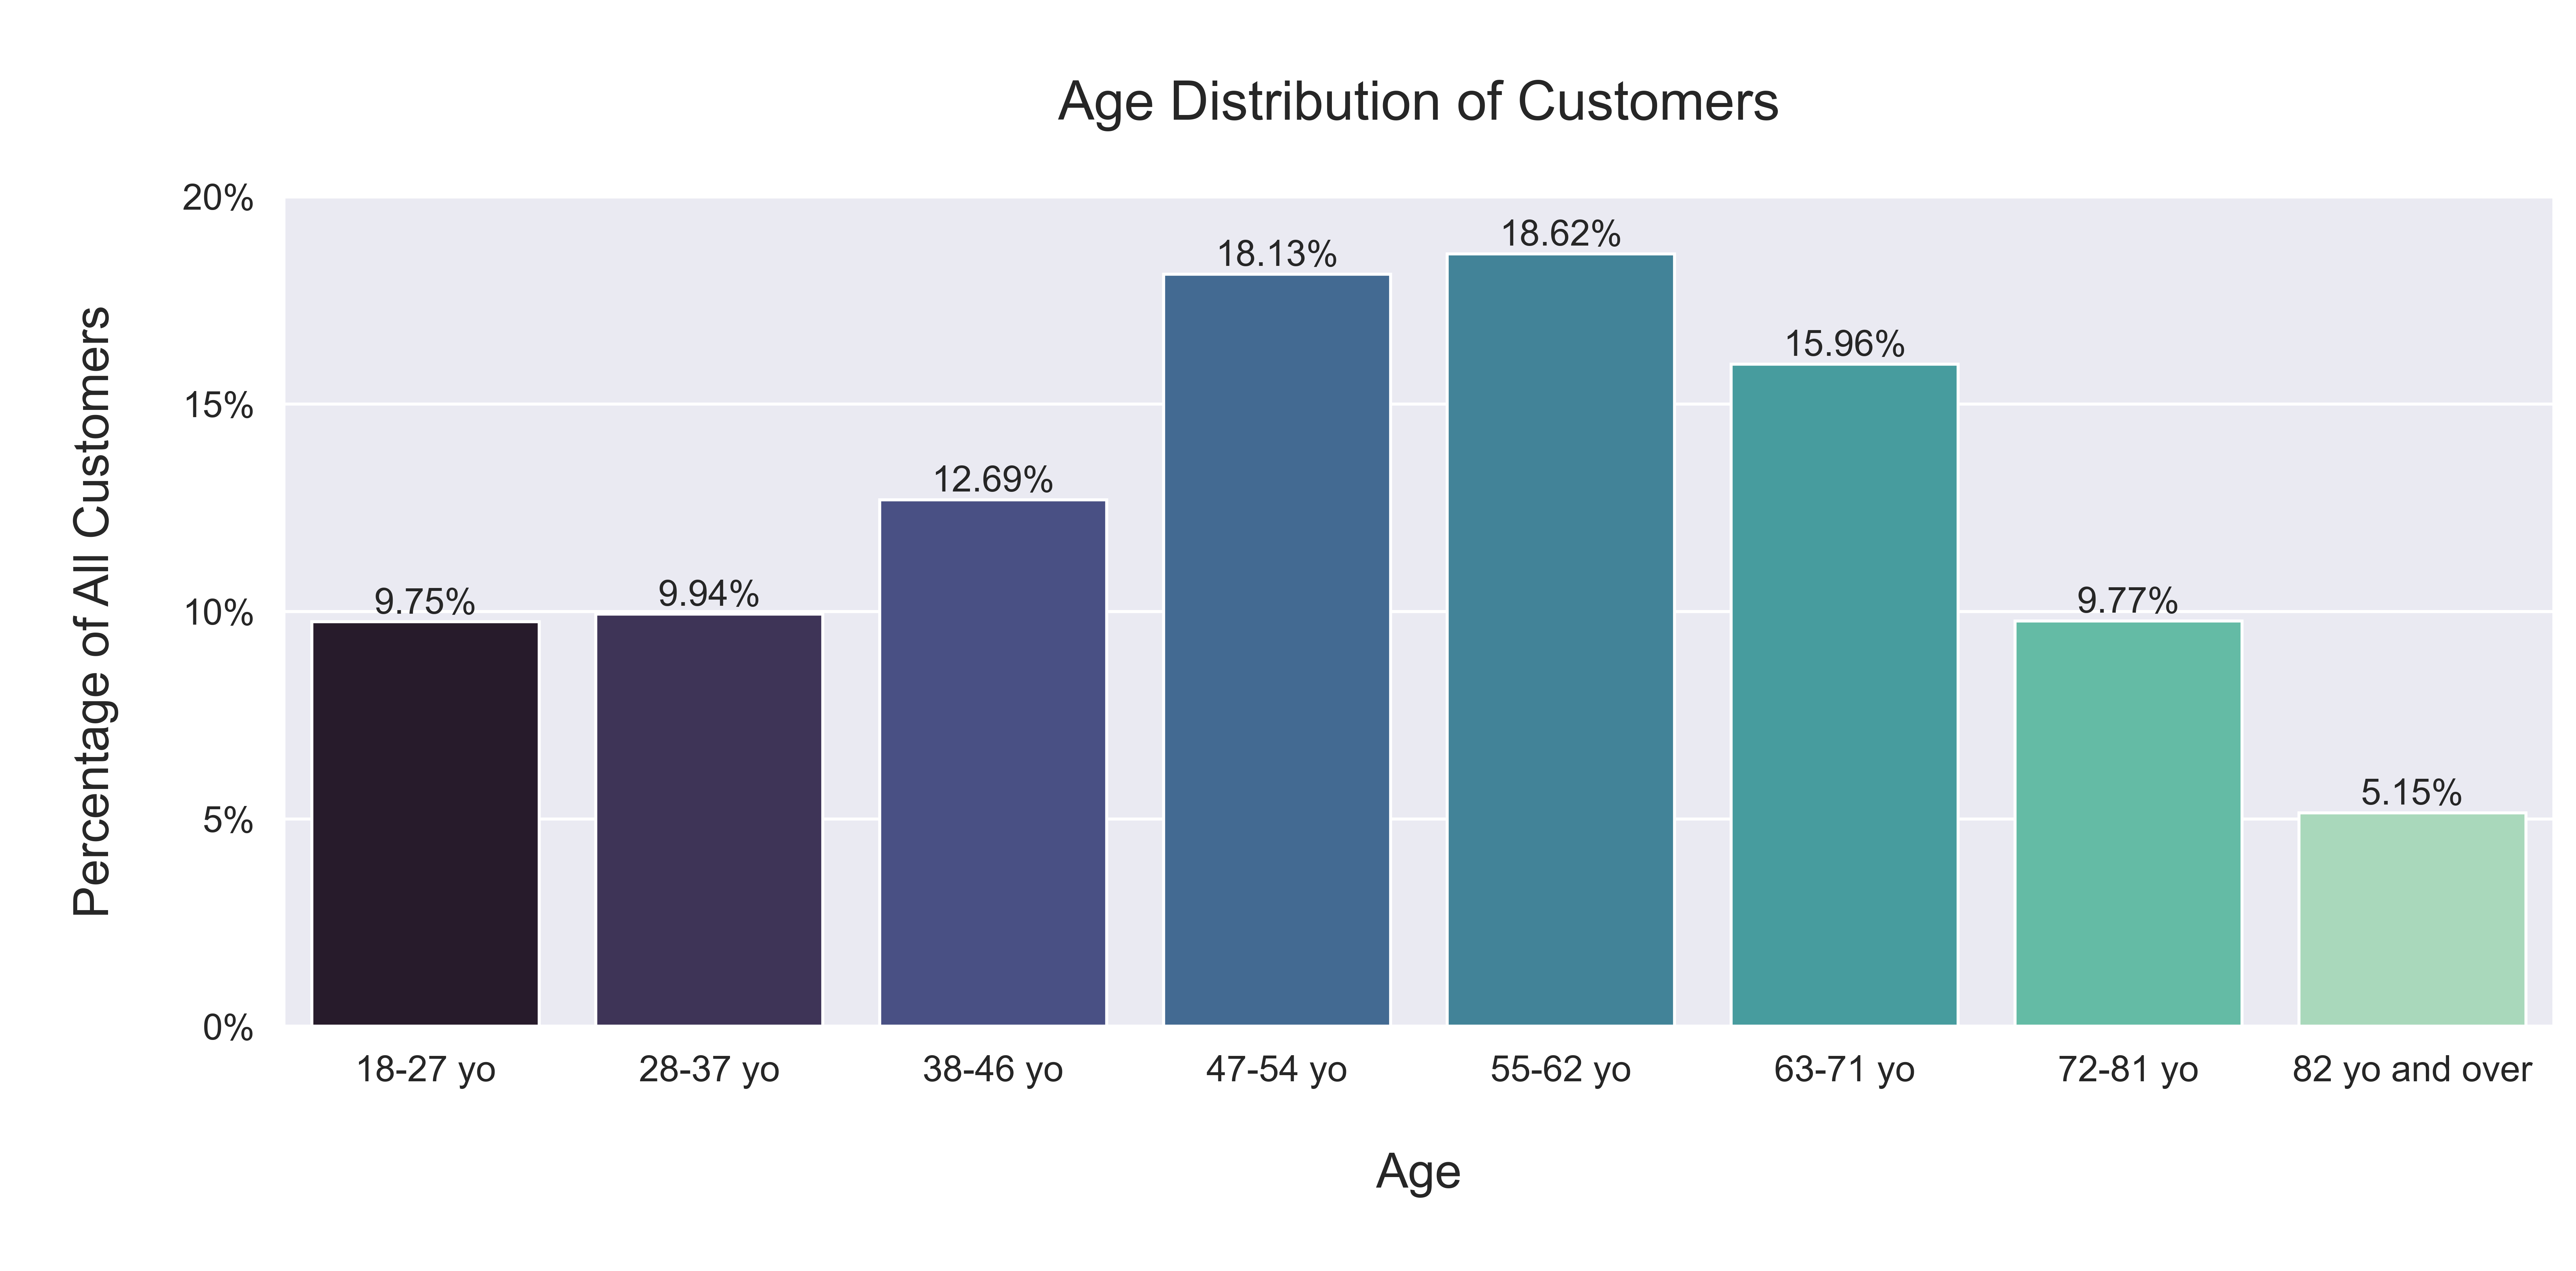

In [10]:
# Visualizing Age
fig, ax = plt.subplots(figsize=(12,6))
age_group_percentage = (customer.value_counts('age_group').sort_index() / customer.shape[0] * 100).round(2)

ax = sns.barplot(x = age_group_percentage.index.values, 
                 y = age_group_percentage, 
                 palette = 'mako')

for i,bar in enumerate(ax.patches):
    x, y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
         str(age_group_percentage[i]) + '%',
         ha = 'center', fontsize = 12)

yticks = np.arange(0,25,5)
yticklabels = [str(y) + '%' for y in yticks]
plt.yticks(yticks, labels = yticklabels)

plt.xlabel('\nAge\n')
plt.ylabel('\nPercentage of All Customers\n')
plt.title('\nAge Distribution of Customers\n')

plt.tight_layout()

Age Analysis: <br>
As expected, 47-62 year olds make up 36.75 % of all of the customers. Further, customers ages 38-71 make up 65.37 % of Starbucks customers. Intially, I thought that the younger age groups (18-37) would represent more than 20 % of all Starbucks customers, especially with the "fast-pace" life that they typically live. 
<br>
<br>
**Gender**

In [11]:
# Gender percentages
per =  customer['gender'].value_counts()
gender_per = (per/ len(customer['gender']))*100
gender_per.round(2)

Male      57.23
Female    41.34
Other      1.43
Name: gender, dtype: float64

(Not much else to visualize)

Gender Observations: 
- 57.2% of customers are male
- 41.3% of customers are female
- 1.4% of customers identify as other

**Income**

In [12]:
customer['income'].describe()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

Income Observations: 
- Customers make anywhere from $30,000 to $120,000 annually. 
- The majoritiy of customers make between $49,000 and $80,000 with the mean income of ~ $65,404. 

In [13]:
# Similar to age groups
income_breaks = jenkspy.jenks_breaks(customer['income'], n_classes= 6)
income_breaks

[30000.0, 43000.0, 56000.0, 68000.0, 83000.0, 100000.0, 120000.0]

In [15]:
labels = ['30-43k', '43-56k', '56-68k',
          '68-83k', '83-100k', 'over 100k']

income_group = pd.cut(customer['income'], 
                   bins = income_breaks,  
                   labels = labels,
                   include_lowest=True)

customer['income_group'] = income_group

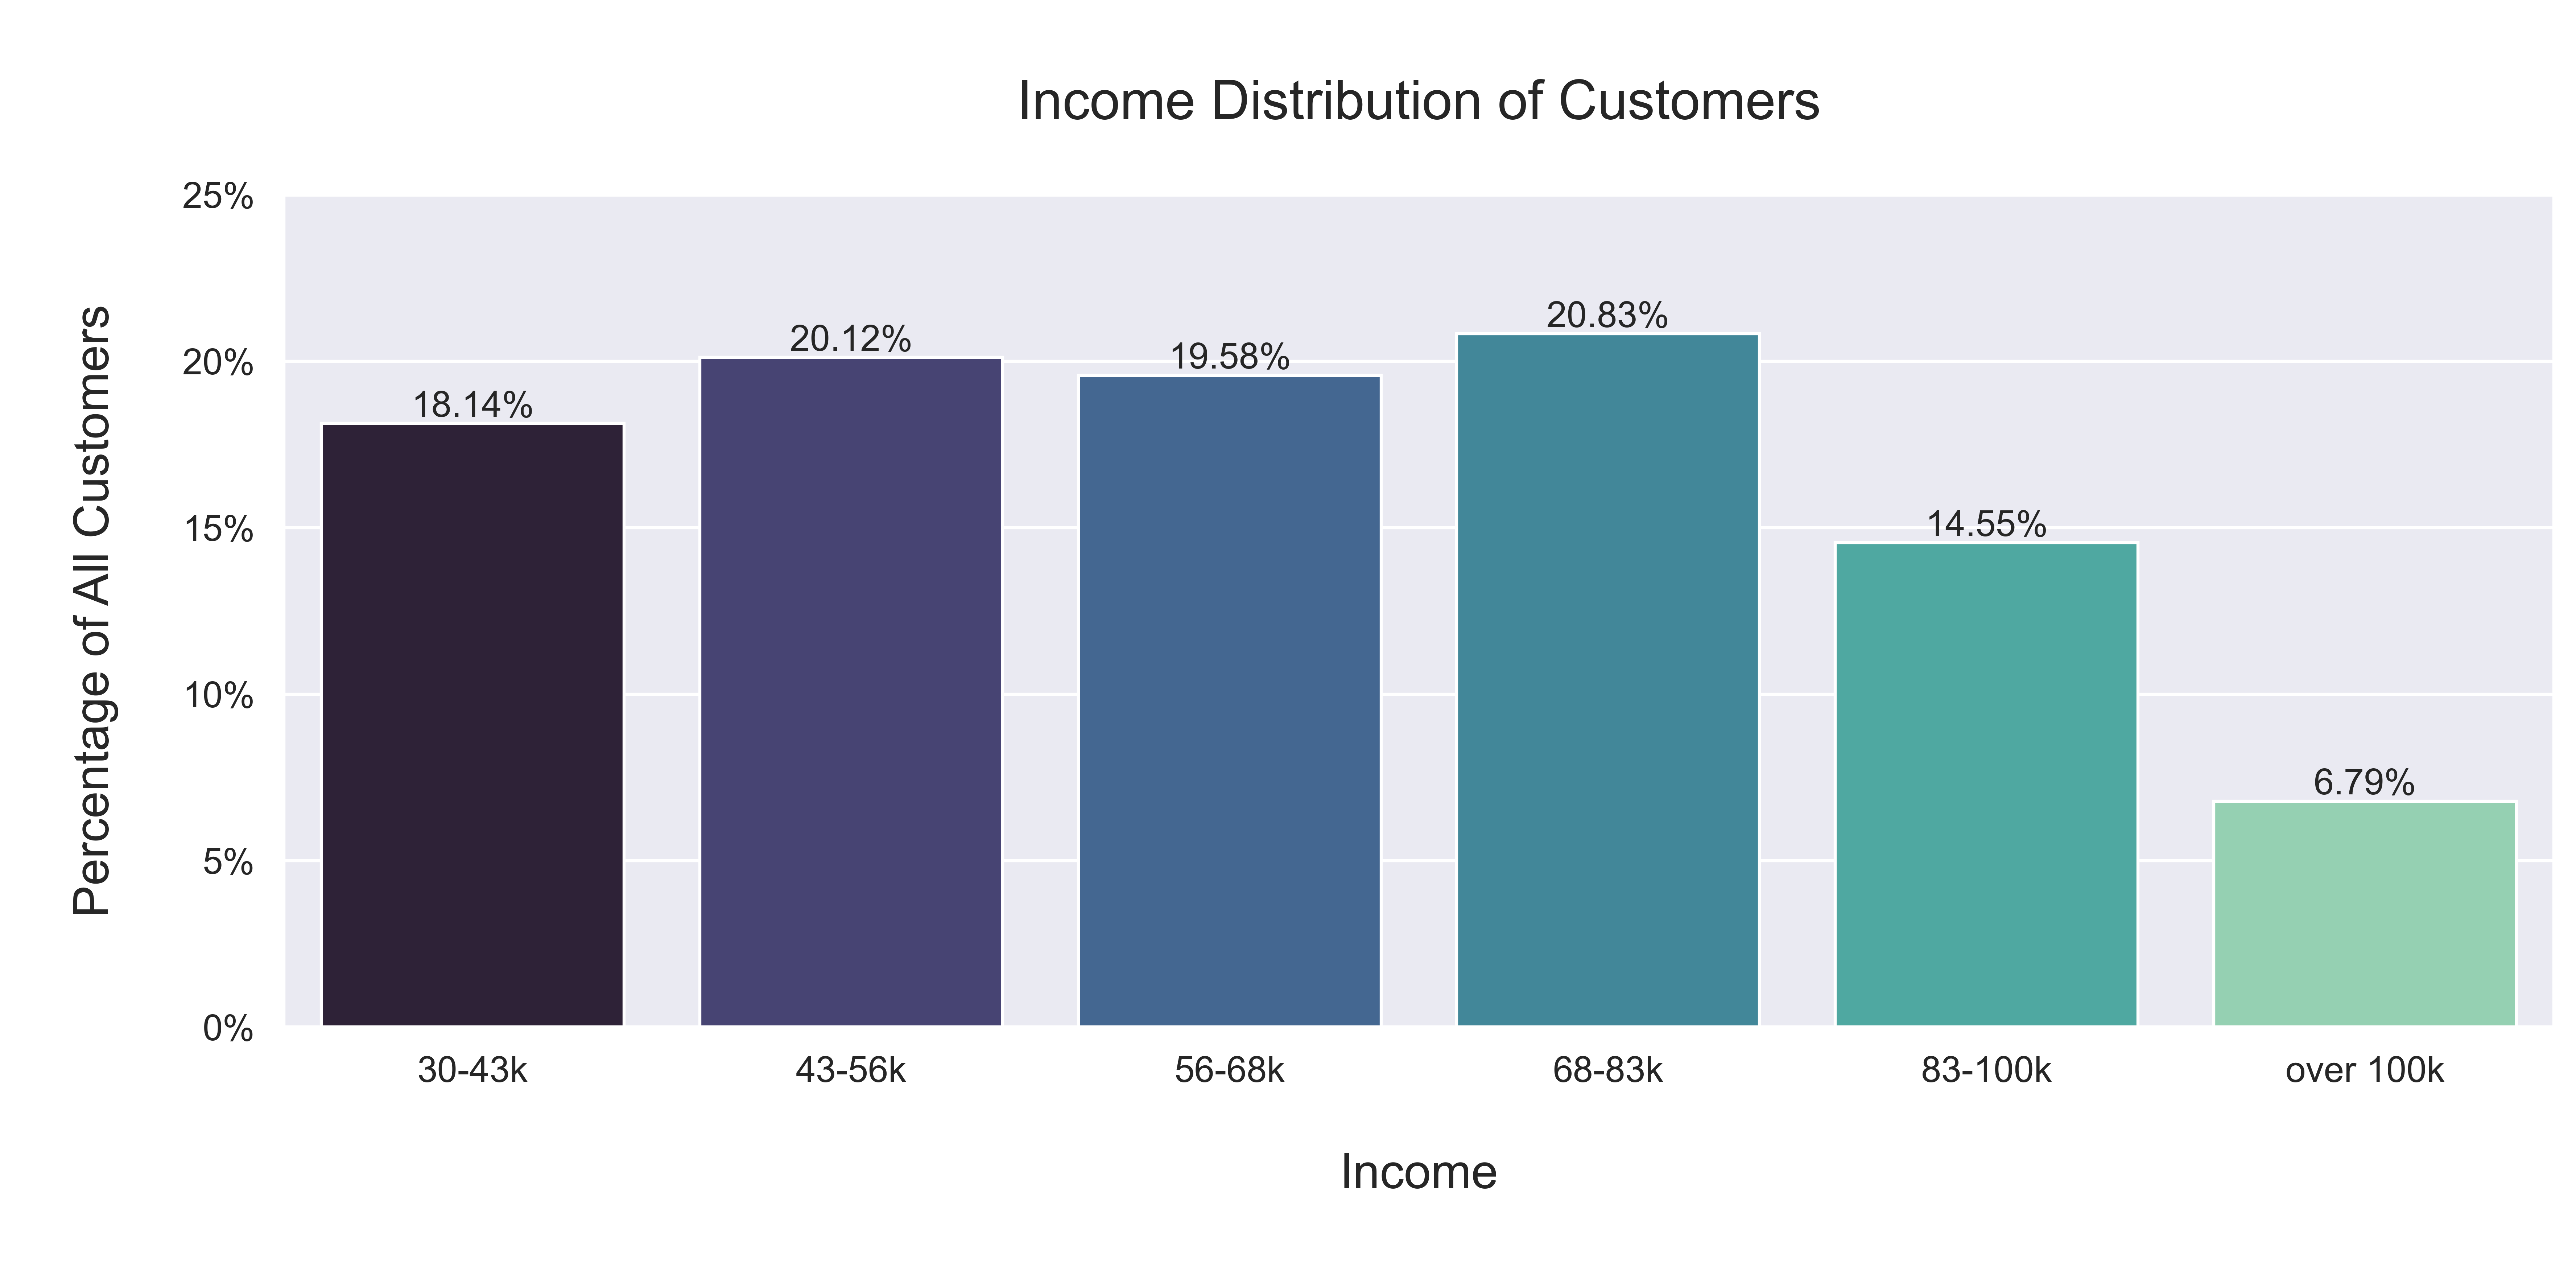

In [16]:
# Visualizing Income distribution
income_group_percentage = (customer.value_counts('income_group').sort_index() / customer.shape[0] * 100).round(2)
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.barplot(x = income_group_percentage.index.values, 
                 y = income_group_percentage, 
                 palette= "mako")

for i,bar in enumerate(ax.patches):
    x, y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
         str(income_group_percentage[i]) + '%',
         ha = 'center', fontsize = 12)
    

yticks = np.arange(0,30,5)
yticklabels = [str(y) + '%' for y in yticks]
plt.yticks(yticks, labels = yticklabels)

plt.xlabel('\nIncome\n')
plt.ylabel('\nPercentage of All Customers\n')
plt.title('\nIncome Distribution of Customers\n')

plt.tight_layout()

Income Analysis: <br>
The 43-56k and 68-83k income ranges account for the most customers, with the 56-68k income group in a very close second. The top three income ranges (43-83k) account for just over 60% of all customers. 

**Member Growth**

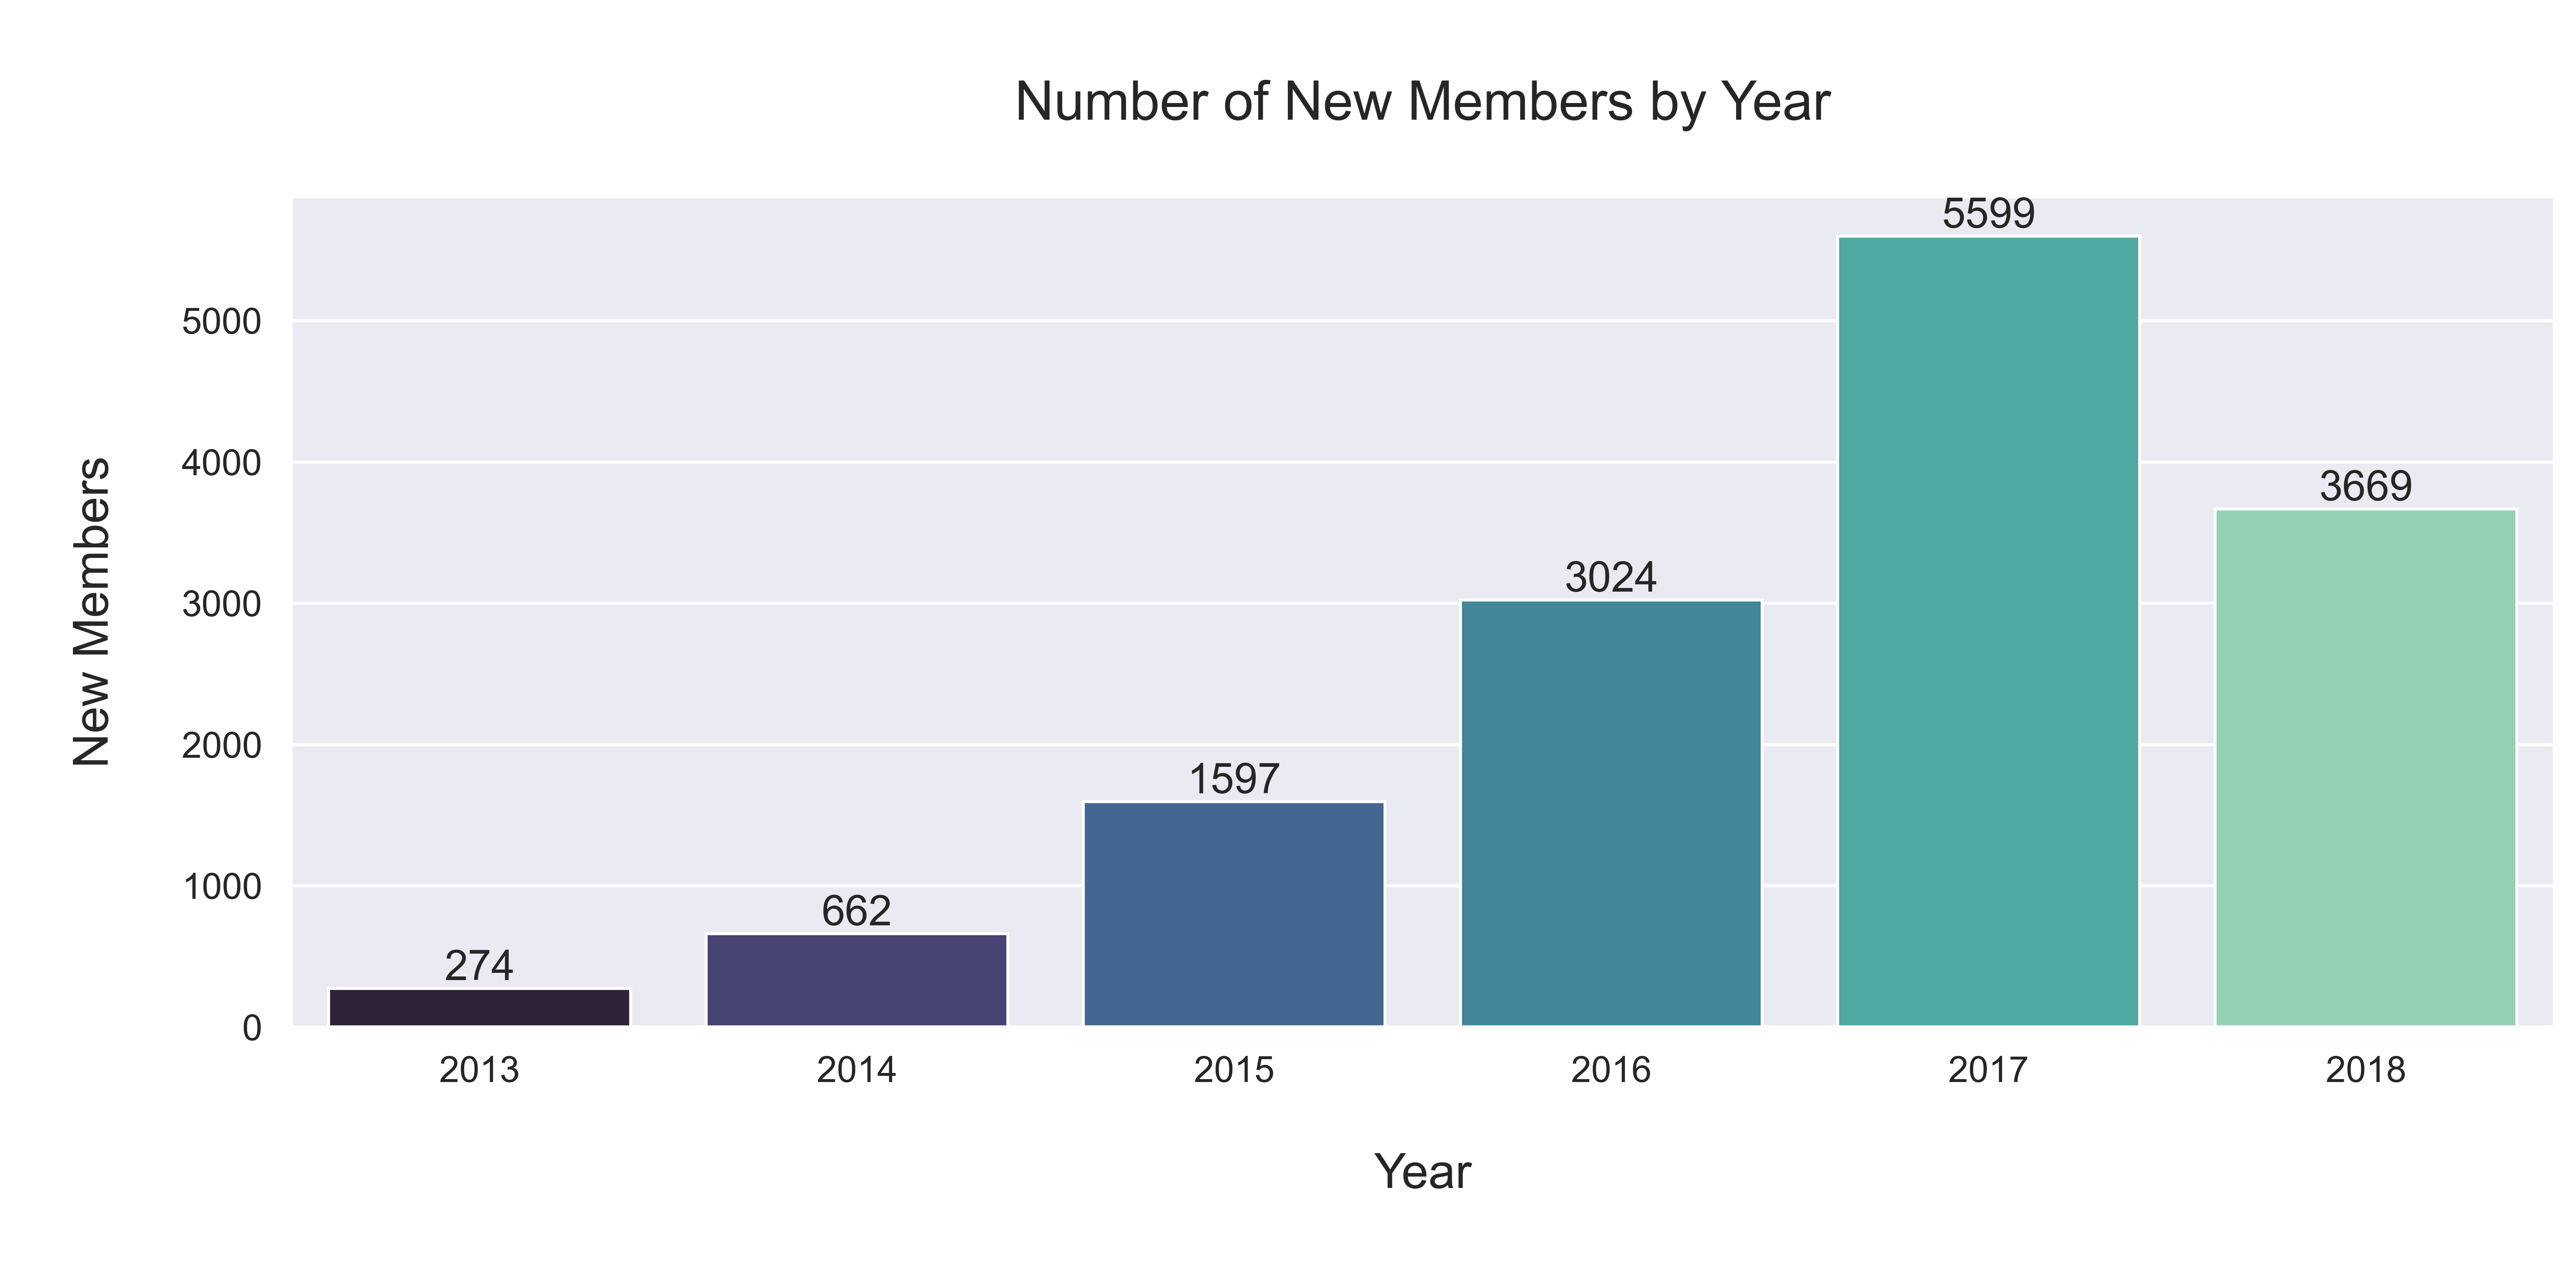

In [17]:
# By year
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(data = customer, x = 'year', palette = 'mako')

for container in ax.containers:
    ax.bar_label(container, fontsize=14)
    
plt.title('\nNumber of New Members by Year\n')
plt.xlabel('\nYear\n')
plt.ylabel('\nNew Members\n')

plt.tight_layout()

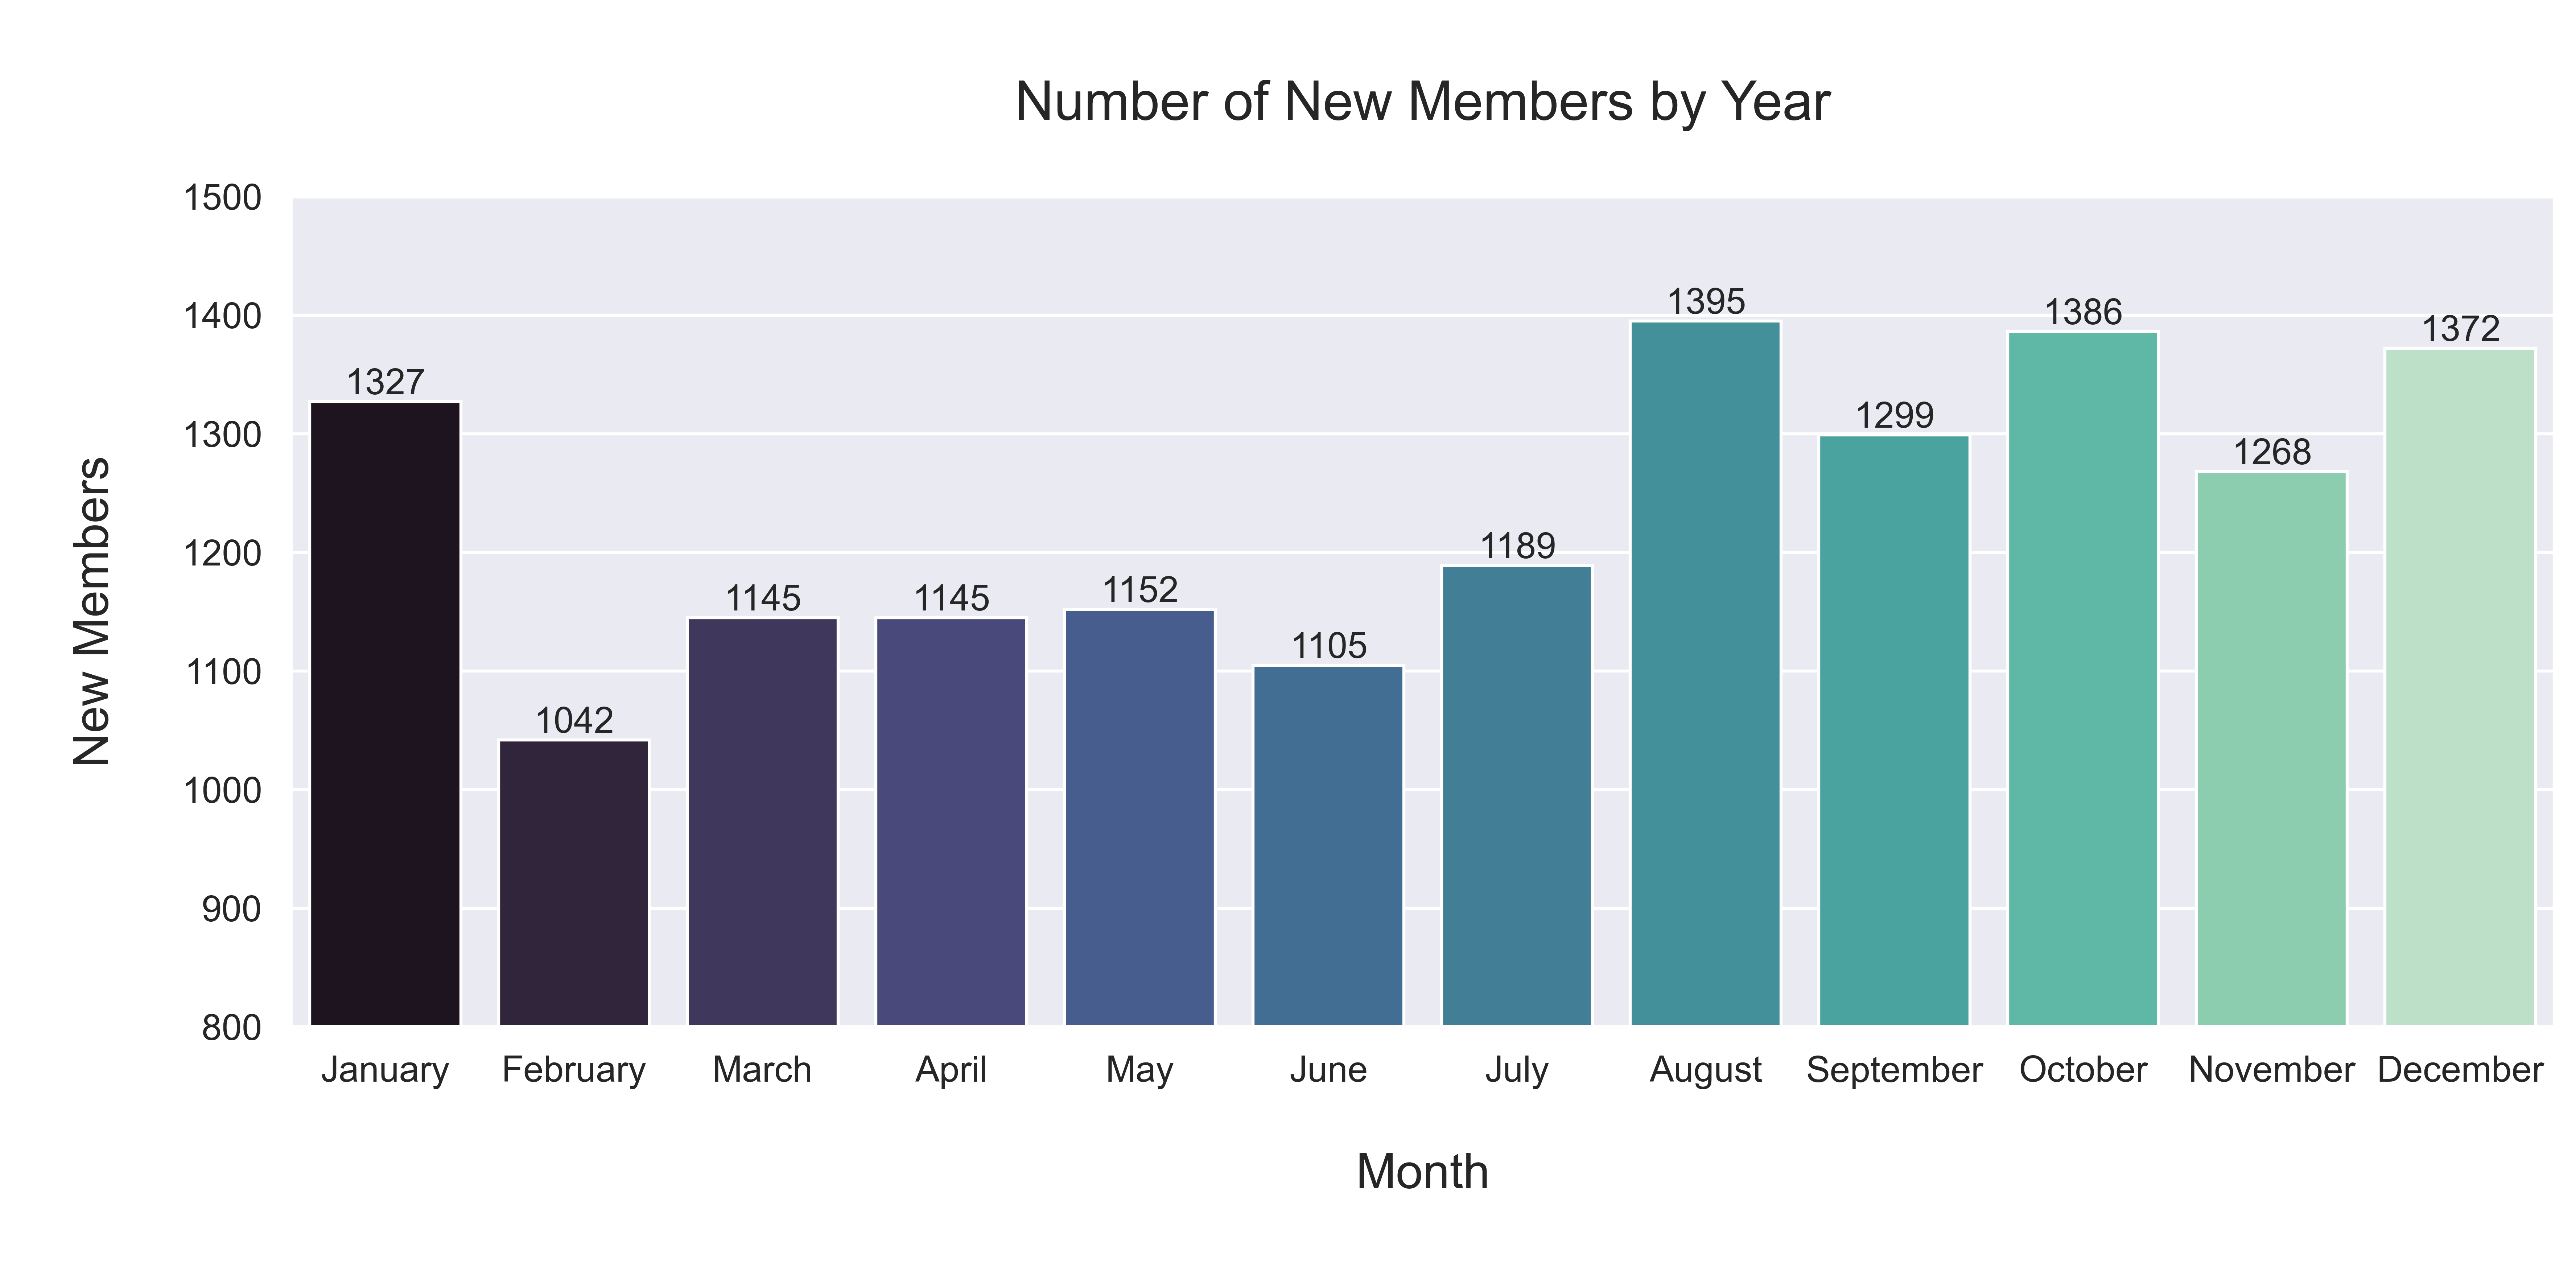

In [18]:
# By month
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(data = customer.sort_values('month_number'), 
                   x = 'month',
                   palette = "mako")

for container in ax.containers:
    ax.bar_label(container, fontsize = 12)
    
#plt.xticks(rotation = 20)
plt.ylim(800, 1500)

plt.title('\nNumber of New Members by Year\n')
plt.xlabel('\nMonth\n')
plt.ylabel('\nNew Members\n')
plt.tight_layout()


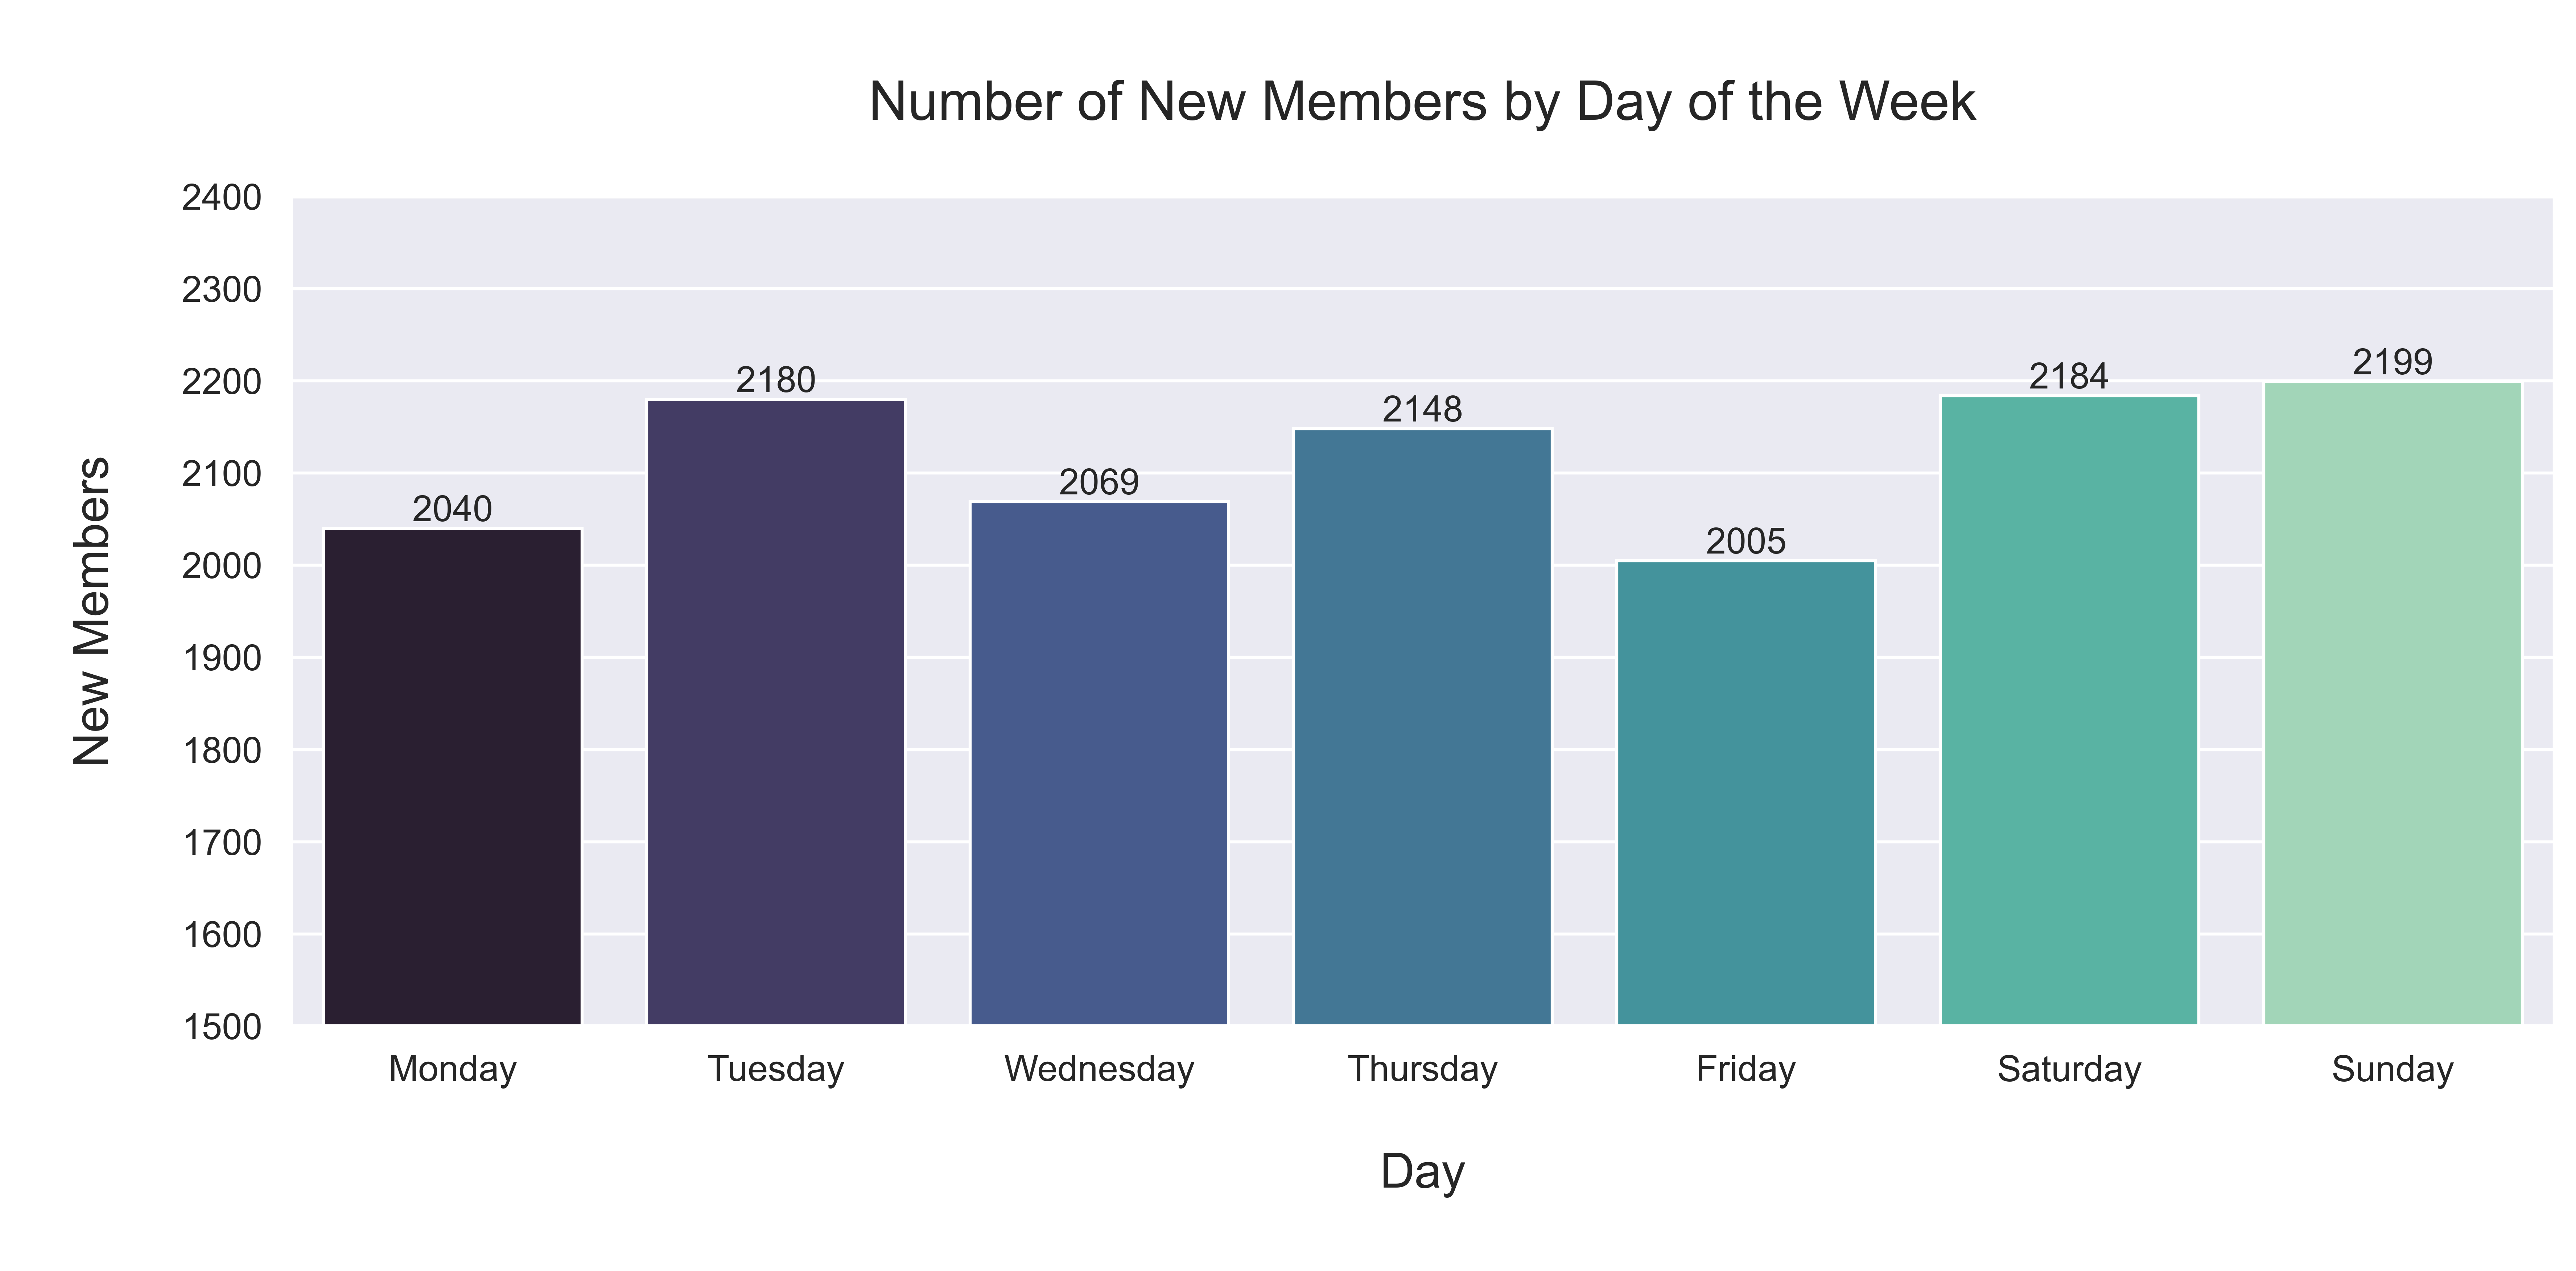

In [19]:
# By day
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(data = customer.sort_values('day_number'), x = 'day',
                 palette= "mako" )

for container in ax.containers:
    ax.bar_label(container, fontsize = 12)
    
#plt.xticks(rotation = 20)
plt.ylim(1500, 2400)
plt.title('\nNumber of New Members by Day of the Week\n')
plt.xlabel('\nDay\n')
plt.ylabel('\nNew Members\n')
plt.tight_layout()

**Member Growth Observations**
- Member growth grew at an almost exponential rate from 2013 to 2017. However, 2018 showed a sharp decline. 
- February is typically the lowest month for member growth. This may be due to February having 2-3 days less than the rest of the months, but not likely. August through January bring in the most customers, suggesting that new member growth is possibly correlated with the US holiday seasons. 
- New memebers are most likely to join over the weekend (Saturday and Sunday). Interestingly, new members are least likely to join on Fridays and Mondays. Tuesday is the best "week" day. 

#### **Bivariate Anaylsis** 
**Income and Age**

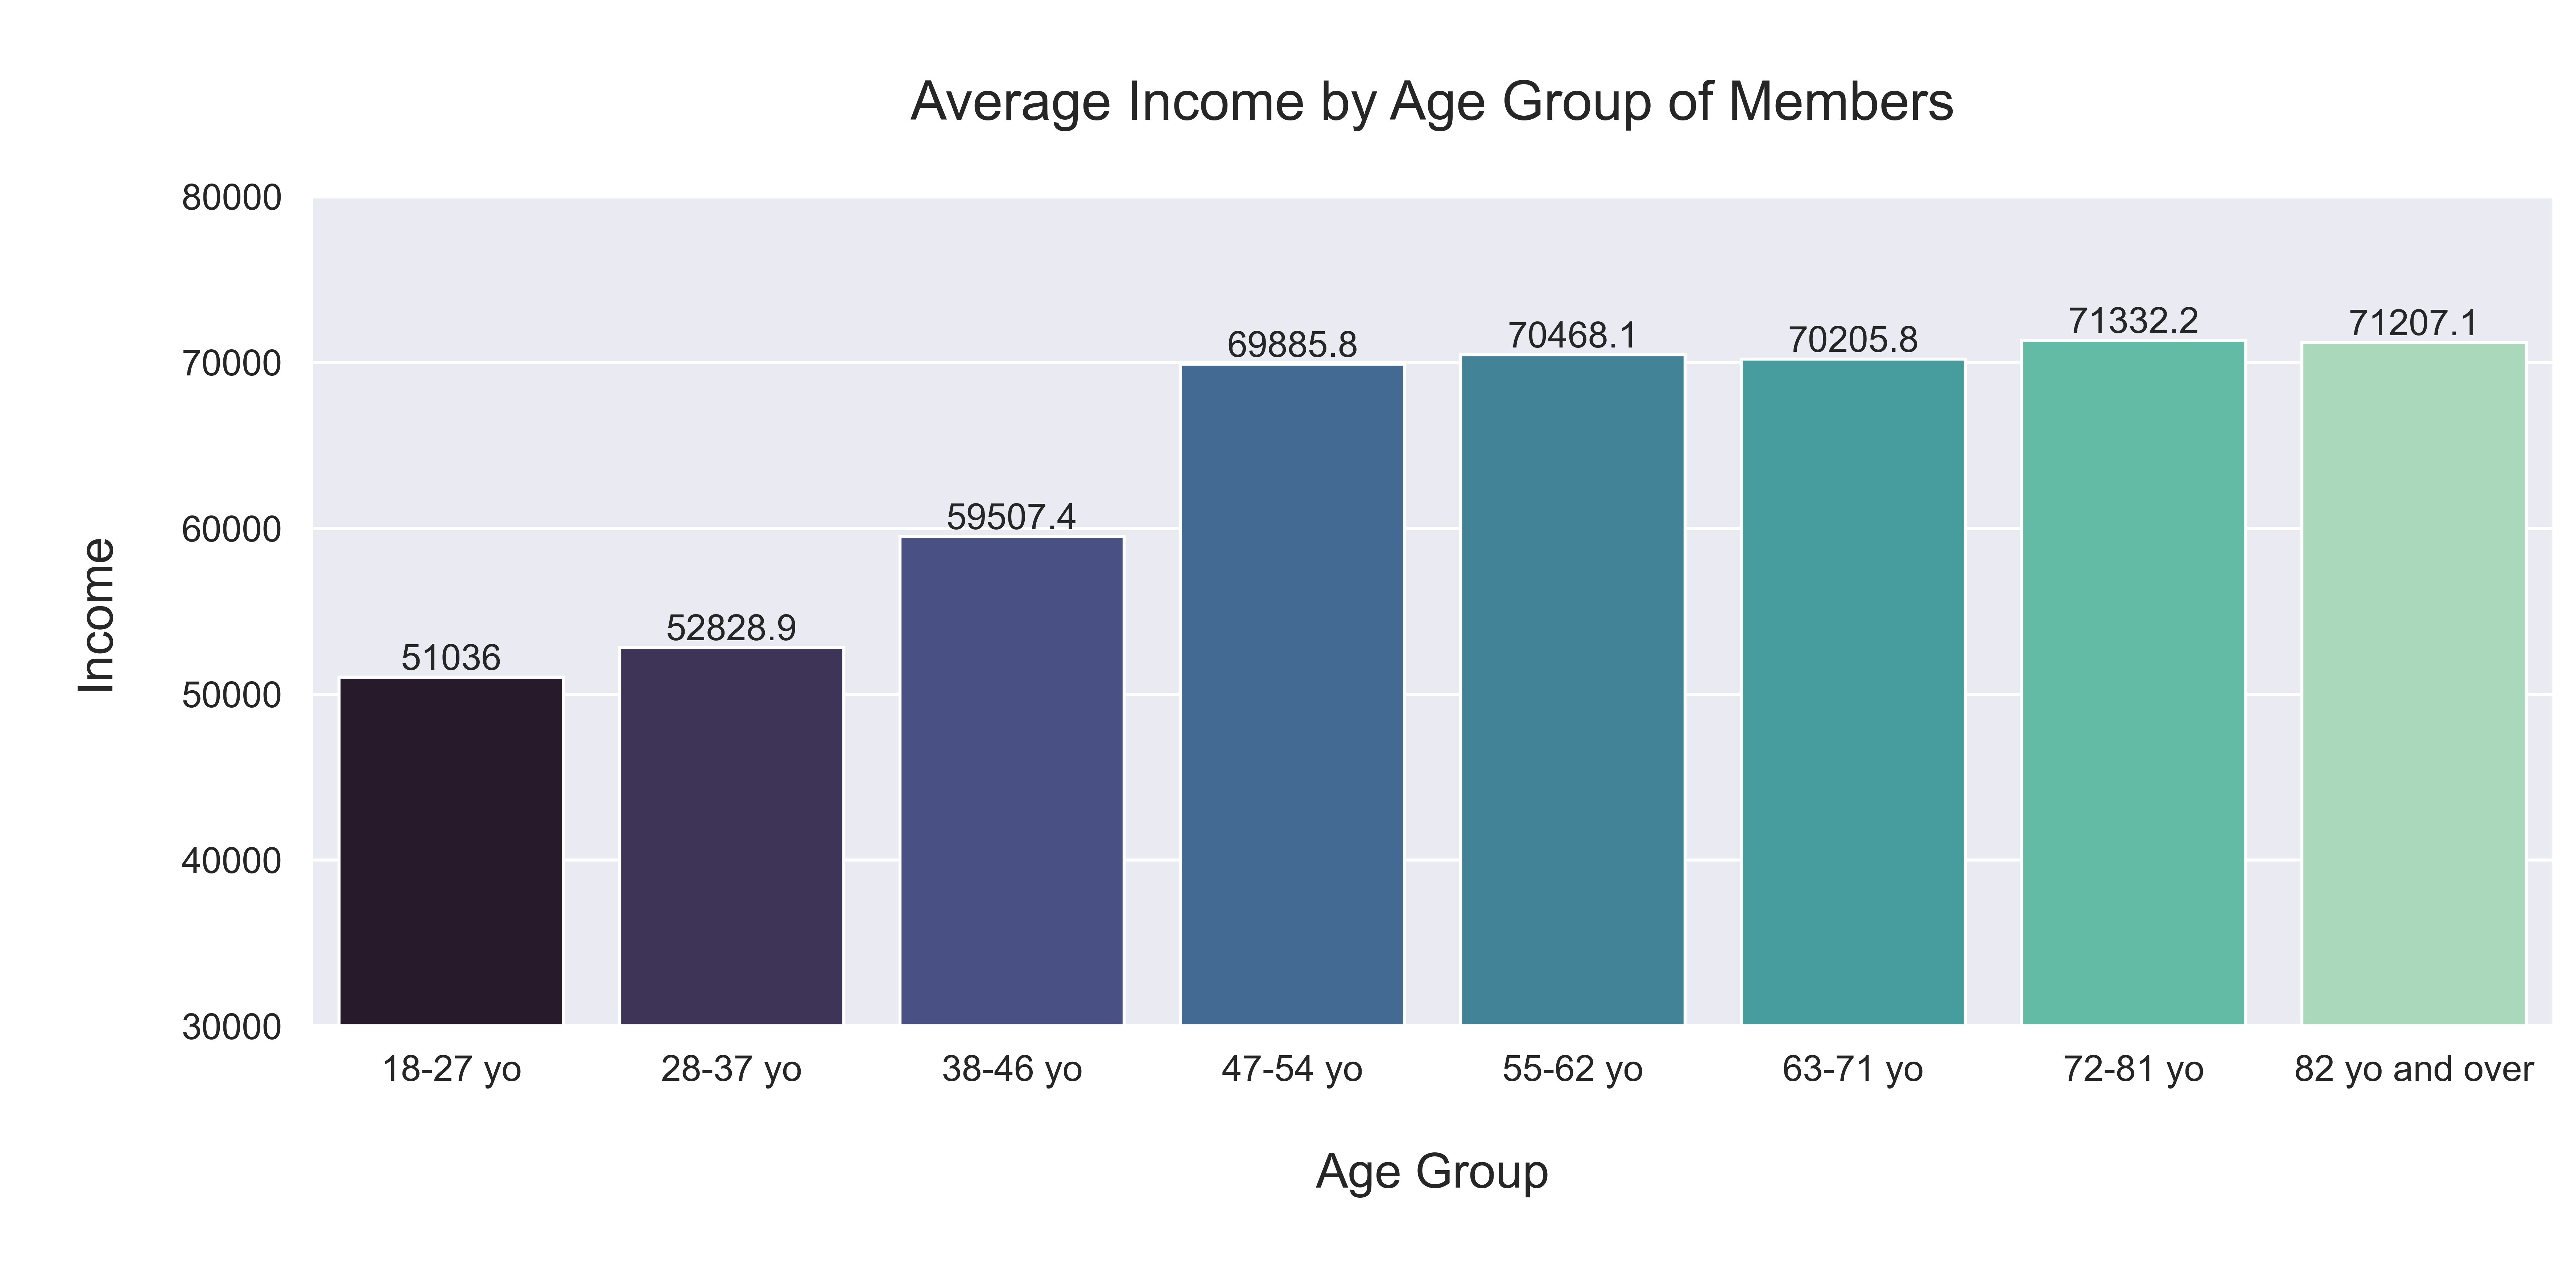

In [21]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(data = customer, x = 'age_group', y = 'income', 
                 ci = None, palette= "mako")


for container in ax.containers:
    ax.bar_label(container, fontsize = 12)

#plt.xticks(rotation = 20)
plt.ylim(30000, 80000)

plt.title('\nAverage Income by Age Group of Members\n')
plt.xlabel('\nAge Group\n')
plt.ylabel('\nIncome\n')
plt.tight_layout()

**Income and Age Observations:**

- The average personal income in the US in 2018 was $ 34,745. The average income in each age group is more than the median US income. 
- It makes sense that the older you are, the more you would make due to experience.
- Customers in the two youngest age groups (18-37 years old) have an average income of just over 50k. The next age group (38-46 years old) has a higher average income of close to 60K. Customers over 47 years of age average 70K or more annually

**Income and Gender**

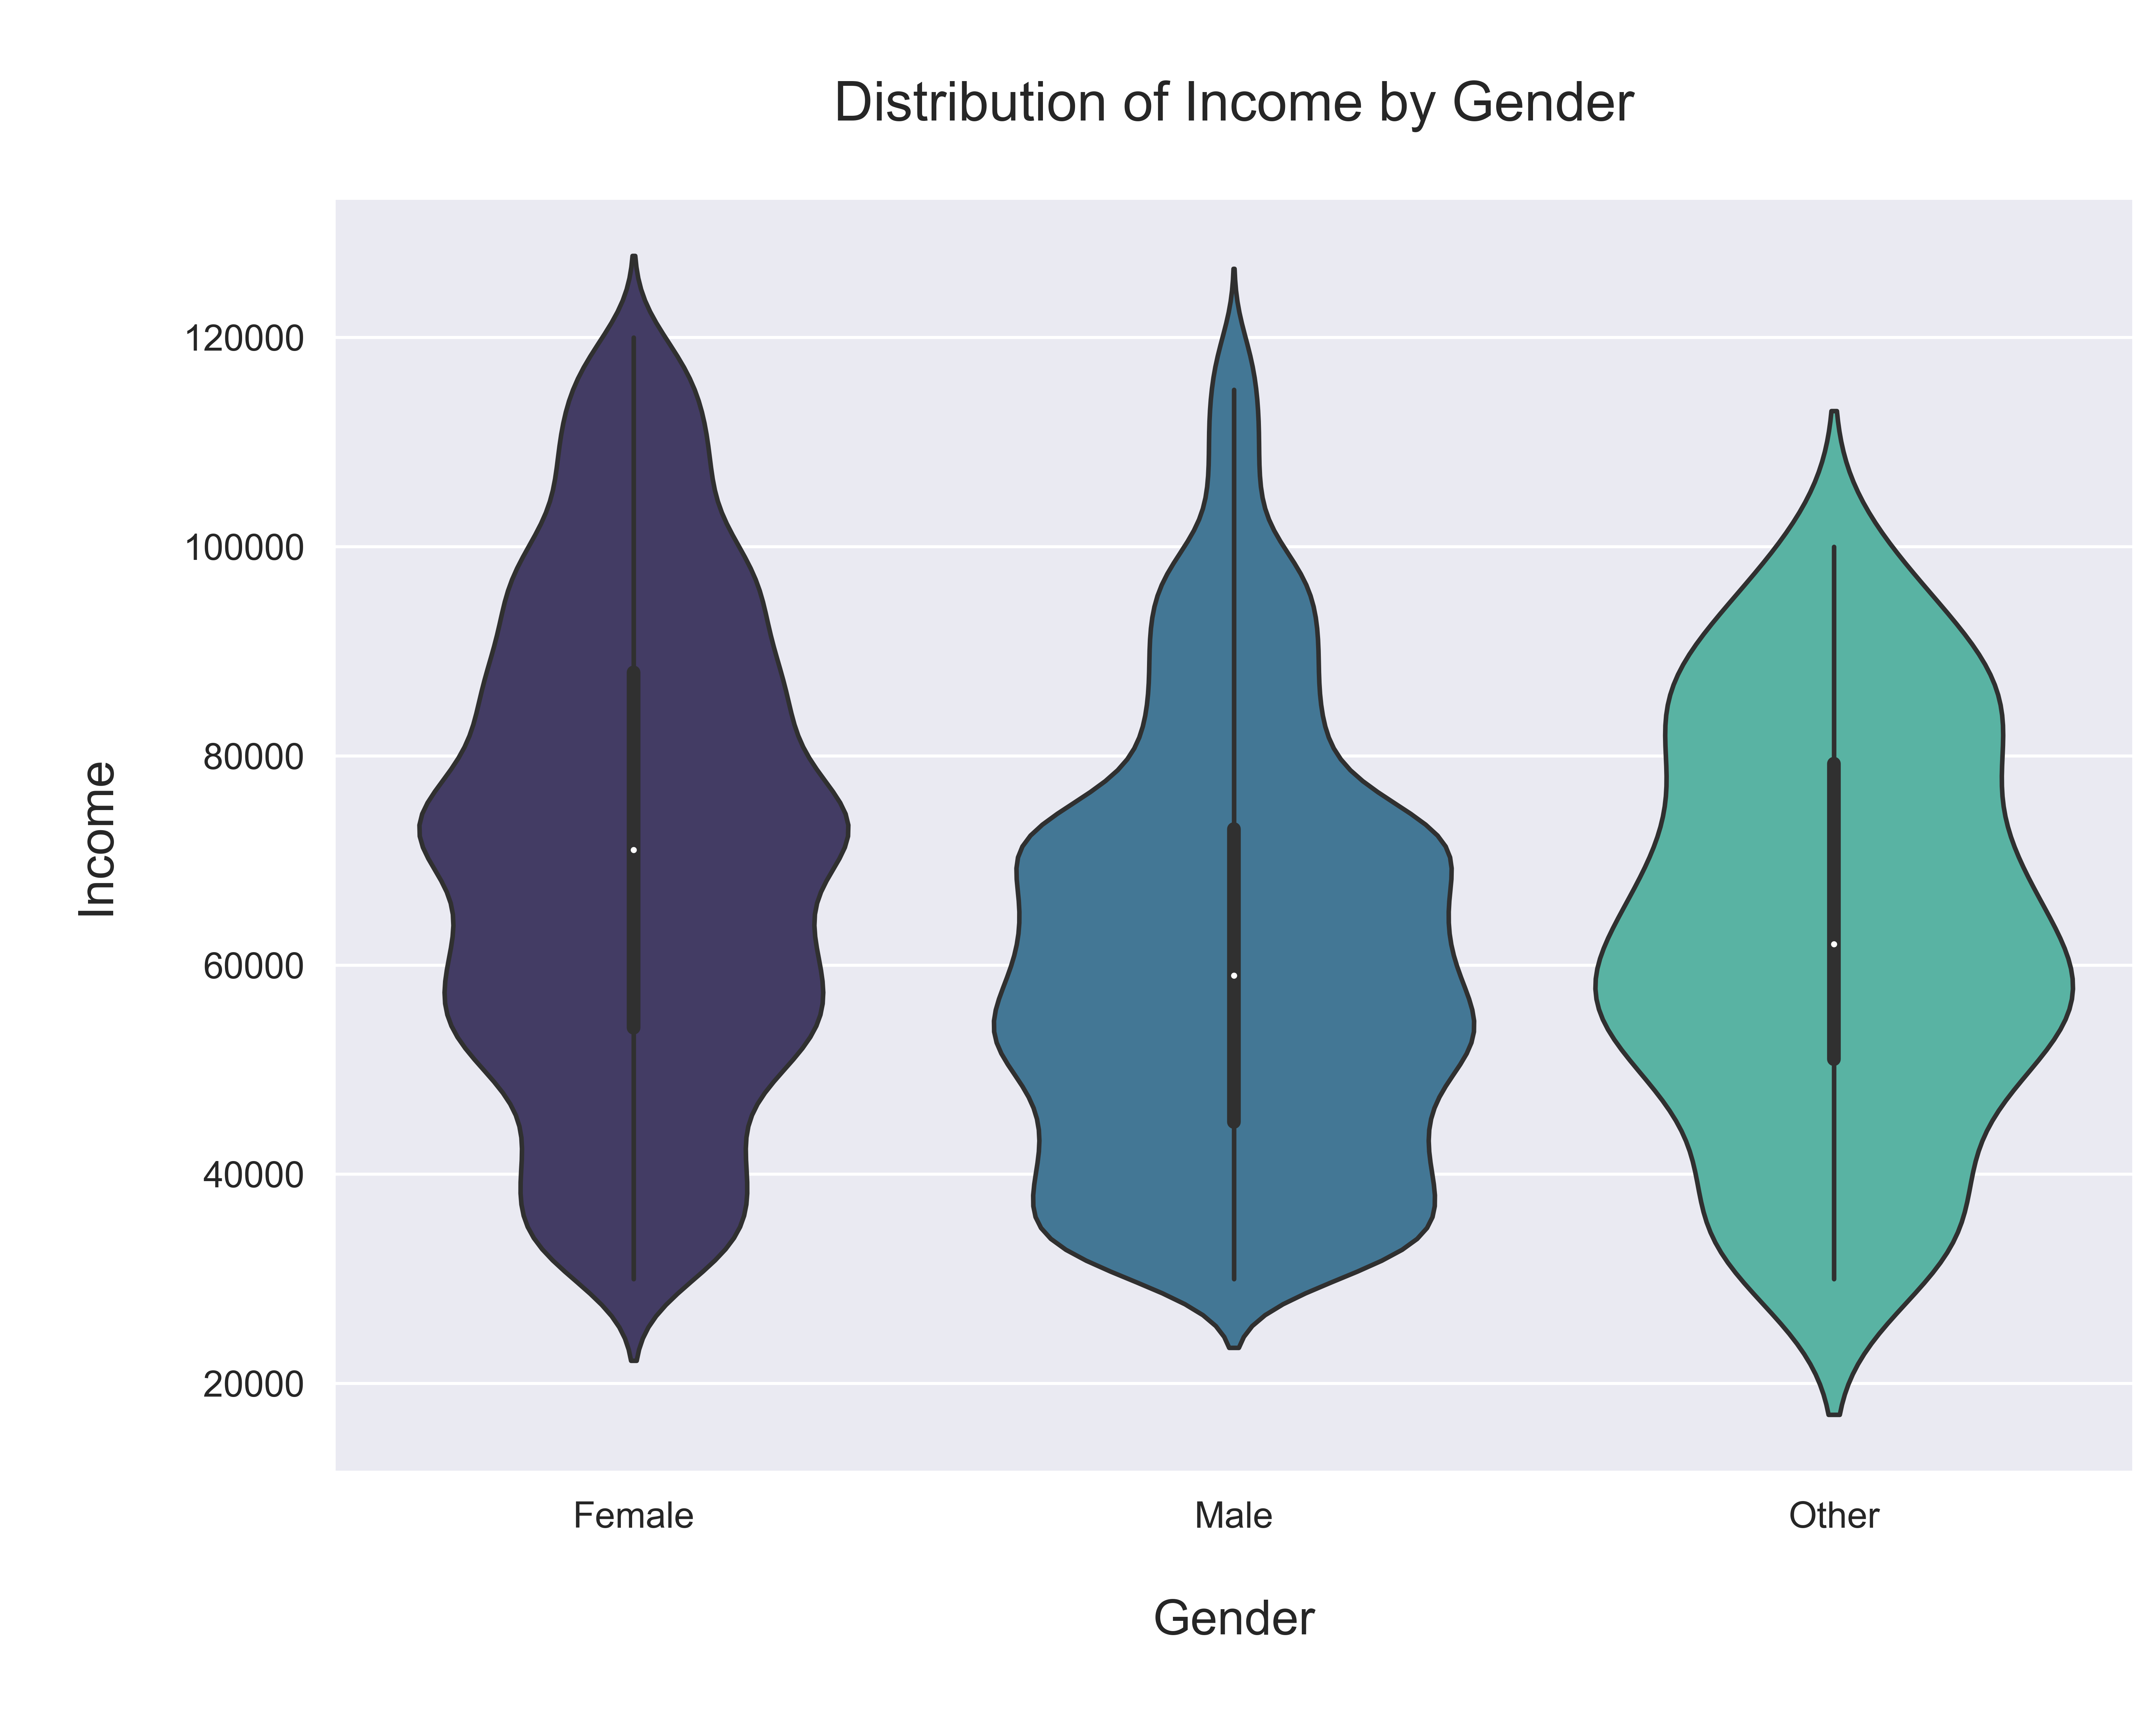

In [40]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.violinplot(data = customer, 
                    x='gender', y='income', 
                    palette = 'mako')

plt.title('\nDistribution of Income by Gender\n')
plt.xlabel('\nGender\n')
plt.ylabel('\nIncome\n')
plt.tight_layout()

In [36]:
customer.groupby('gender').agg({'income': 'mean'}).round(0)

income
gender         
Female  71306.0
Male    61195.0
Other   63288.0

**Income and Gender Observations:** 
- Income of male customers is skewed slightly to the right indicating that males customers are in the lower portion of income. 
- Income of female customers follows a normal distribution. Females have a much higher average income than other genders. 
- The average income of customers identifying as female, male, and other are 71k, 61k and 63k, respectively.

**Age and Gender**

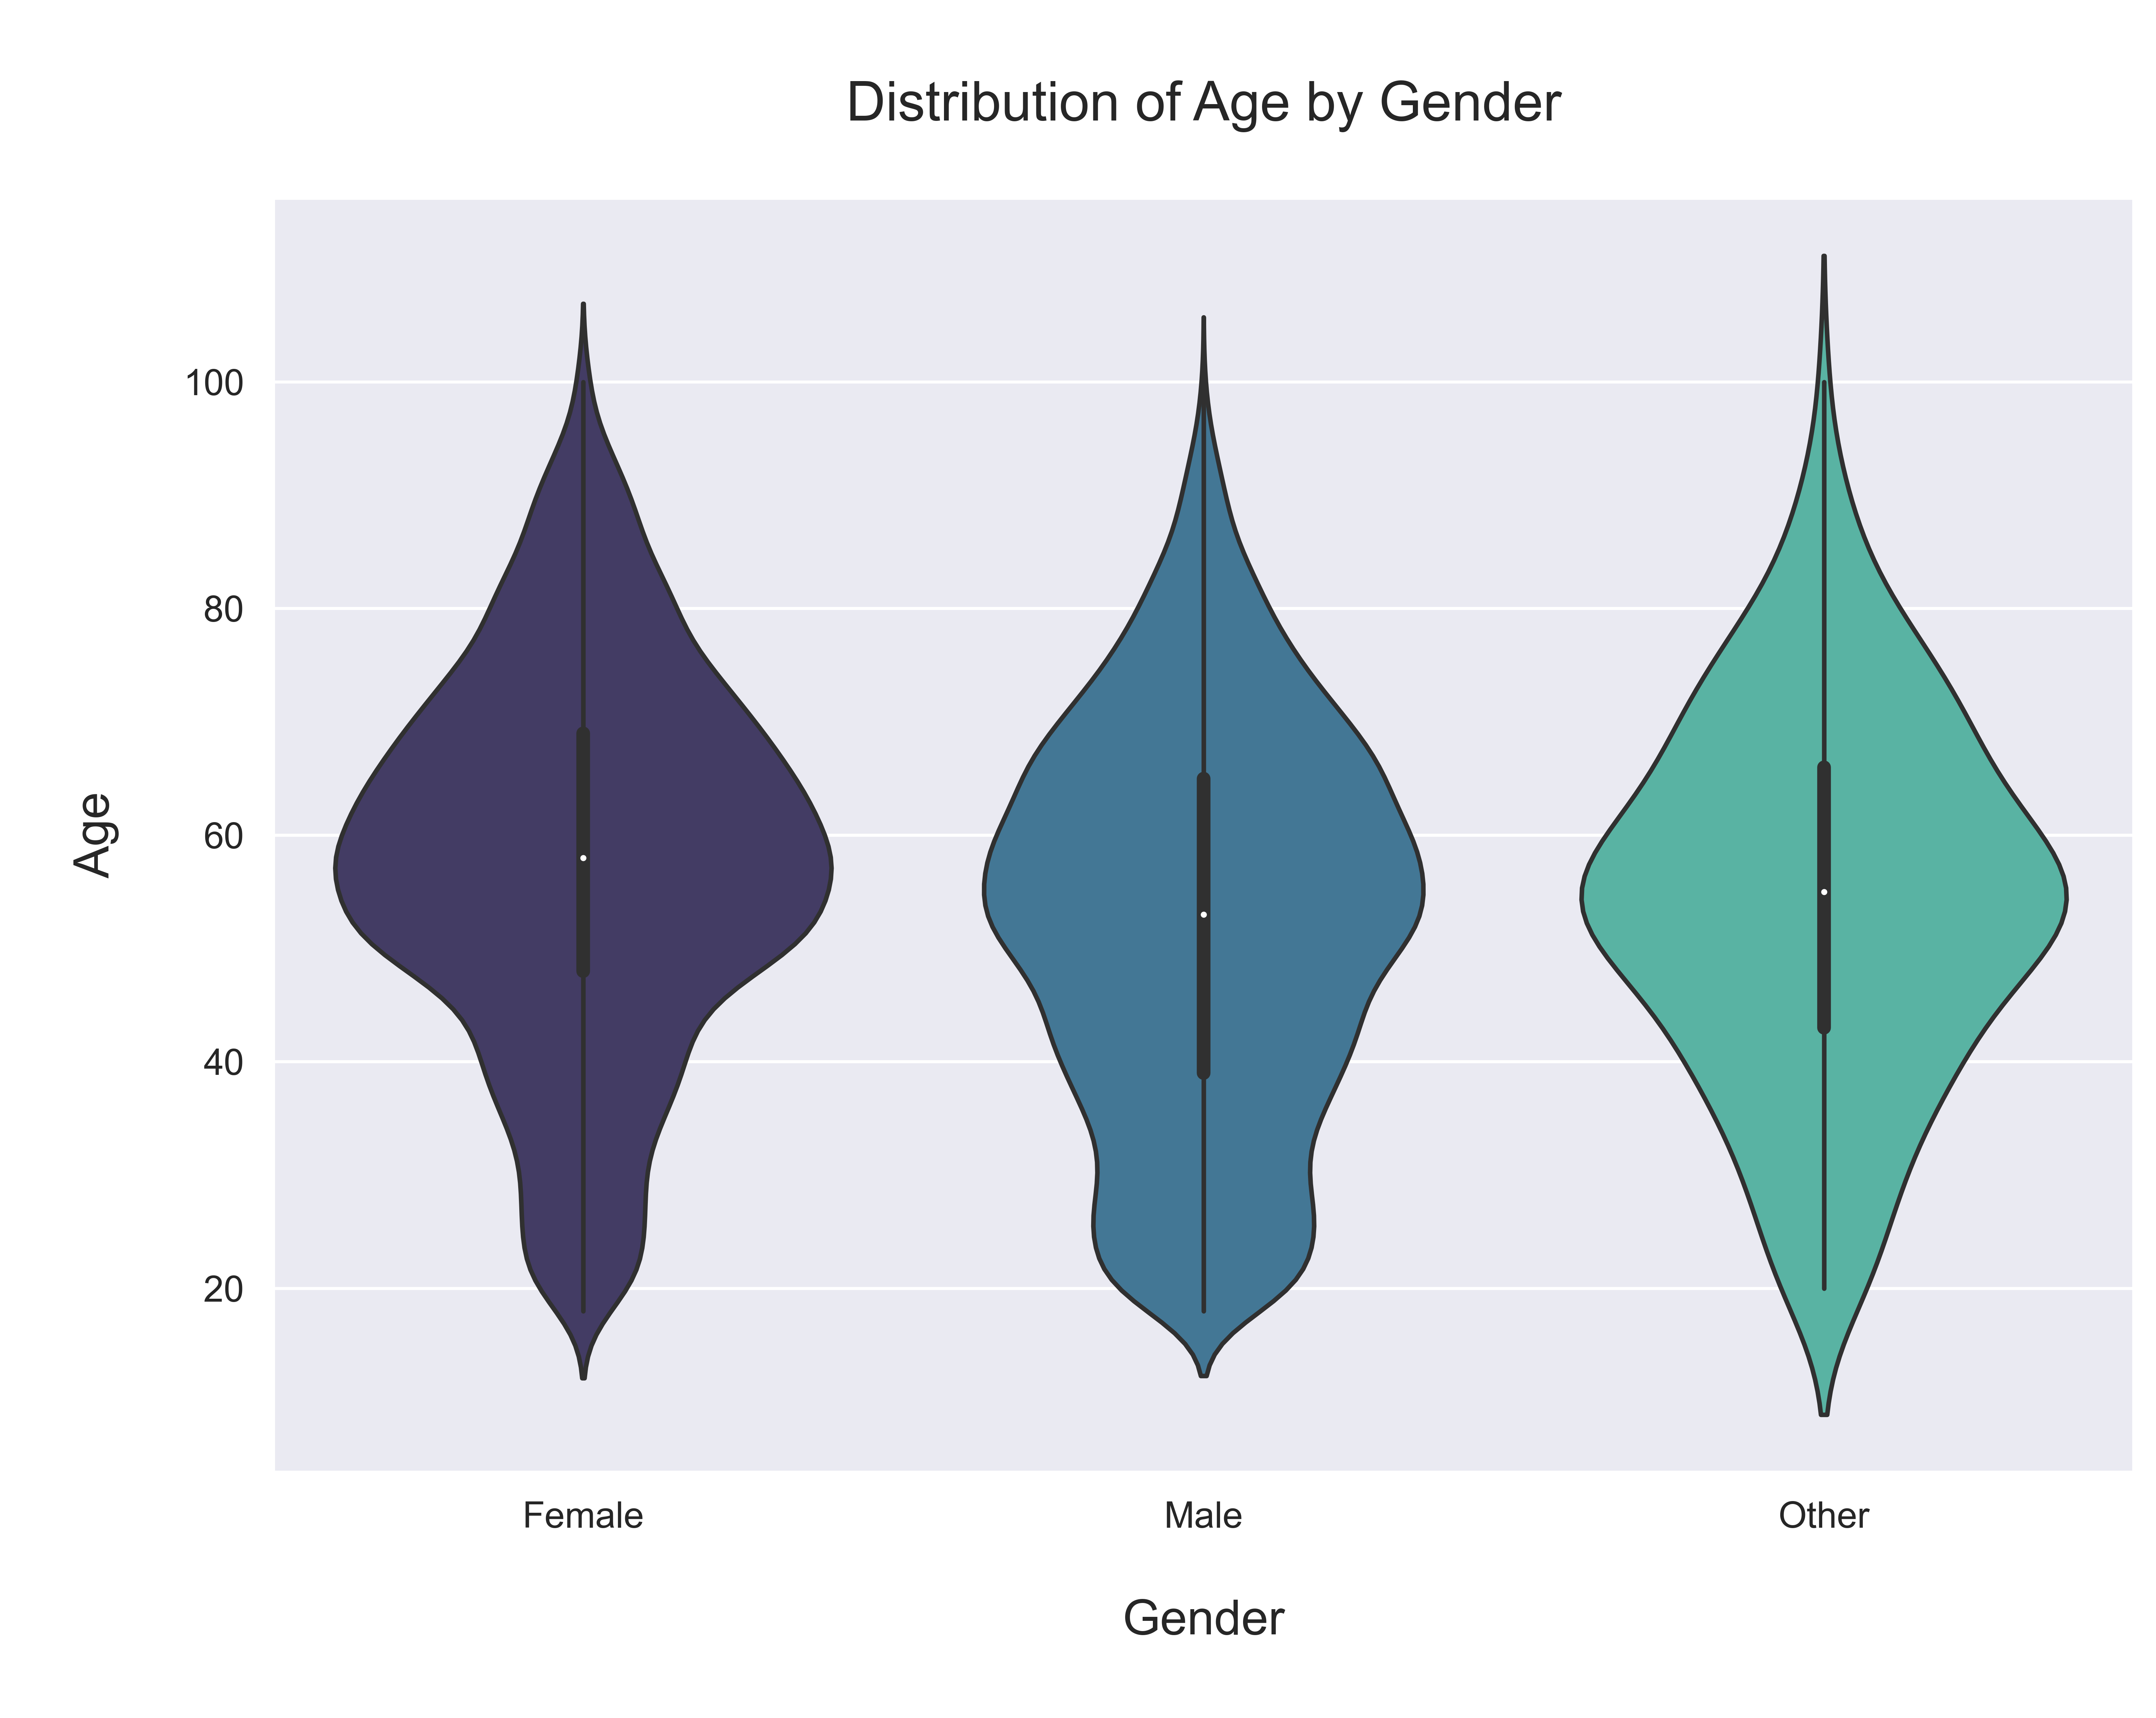

In [41]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.violinplot(data = customer, 
                    x='gender', y='age', 
                    palette = 'mako')

plt.title('\nDistribution of Age by Gender\n')
plt.xlabel('\nGender\n')
plt.ylabel('\nAge\n')
plt.tight_layout()


In [42]:
customer.groupby('gender').agg({'age': 'mean'}).round(1)

age
gender      
Female  57.5
Male    52.1
Other   54.4

**Age and Gender Observations:** 
- The age of female and male cutomers are somewhat normal in distribution. 
- Interestingly, most of the younger customers are male.
- The average age of customers identifying as female, male, and other are 57.5, 52.1, and 54.4, respectively. 

****
## Transcript Dataframe EDA
#### **Univariate Anaylsis** 
**Event**

In [43]:
transcript = pd.read_csv('Cleaned_Transcript.csv').drop('Unnamed: 0', axis = 1)
transcript.head(3)

person           event  hours_since_start  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received                  0   
1  a03223e636434f42ac4c3df47e8bac43  offer received                  0   
2  e2127556f4f64592b11af22de27a7932  offer received                  0   

     key_id                          value_id  
0  offer id  9b98b8c7a33c4b65b9aebfe6a799e6d9  
1  offer id  0b1e1539f2cc45b7b9fa7c272da2e1d7  
2  offer id  2906b810c7d4411798c6938adc9daaa5

In [44]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [45]:
transcript['event'].value_counts()/len(transcript['event'])

transaction        0.453304
offer received     0.248837
offer viewed       0.188315
offer completed    0.109544
Name: event, dtype: float64

**Event Observations:** 
<br>
There are 306,534 total events.
- Transactions make up 45% of the events. Considering only 11% of the events were completed offers, transactions (purchases) continue to occur without any sort of incentive.

- Of the 76,000 offers received, about 58,000 (75.7%) were viewed by customers. This high viewing rate reflects an attractive promotion and high level of customer activity.  

- For the 76,000 offers received and 58,000 offers viewed, around 33,600 offers were completed. This shows that off all received offers, 44% of were later completed. As expected, 62% of the viewed offers turned into a completed offer. The overall completeion of 44% of received offers is high and suggests there is likely a good amount of regulars. 
  
**Event over time**
<br>
Reminder: the transcript dataset used 'time' to represent the number of hours since the promotion began. This was addressed in the cleaning phase by changing the column name to 'hours_since_start'.

In [46]:
# Turning 'hours_since_start' into 'days_since_start'
transcript['days_since_start']= (transcript['hours_since_start']/24).astype(int)

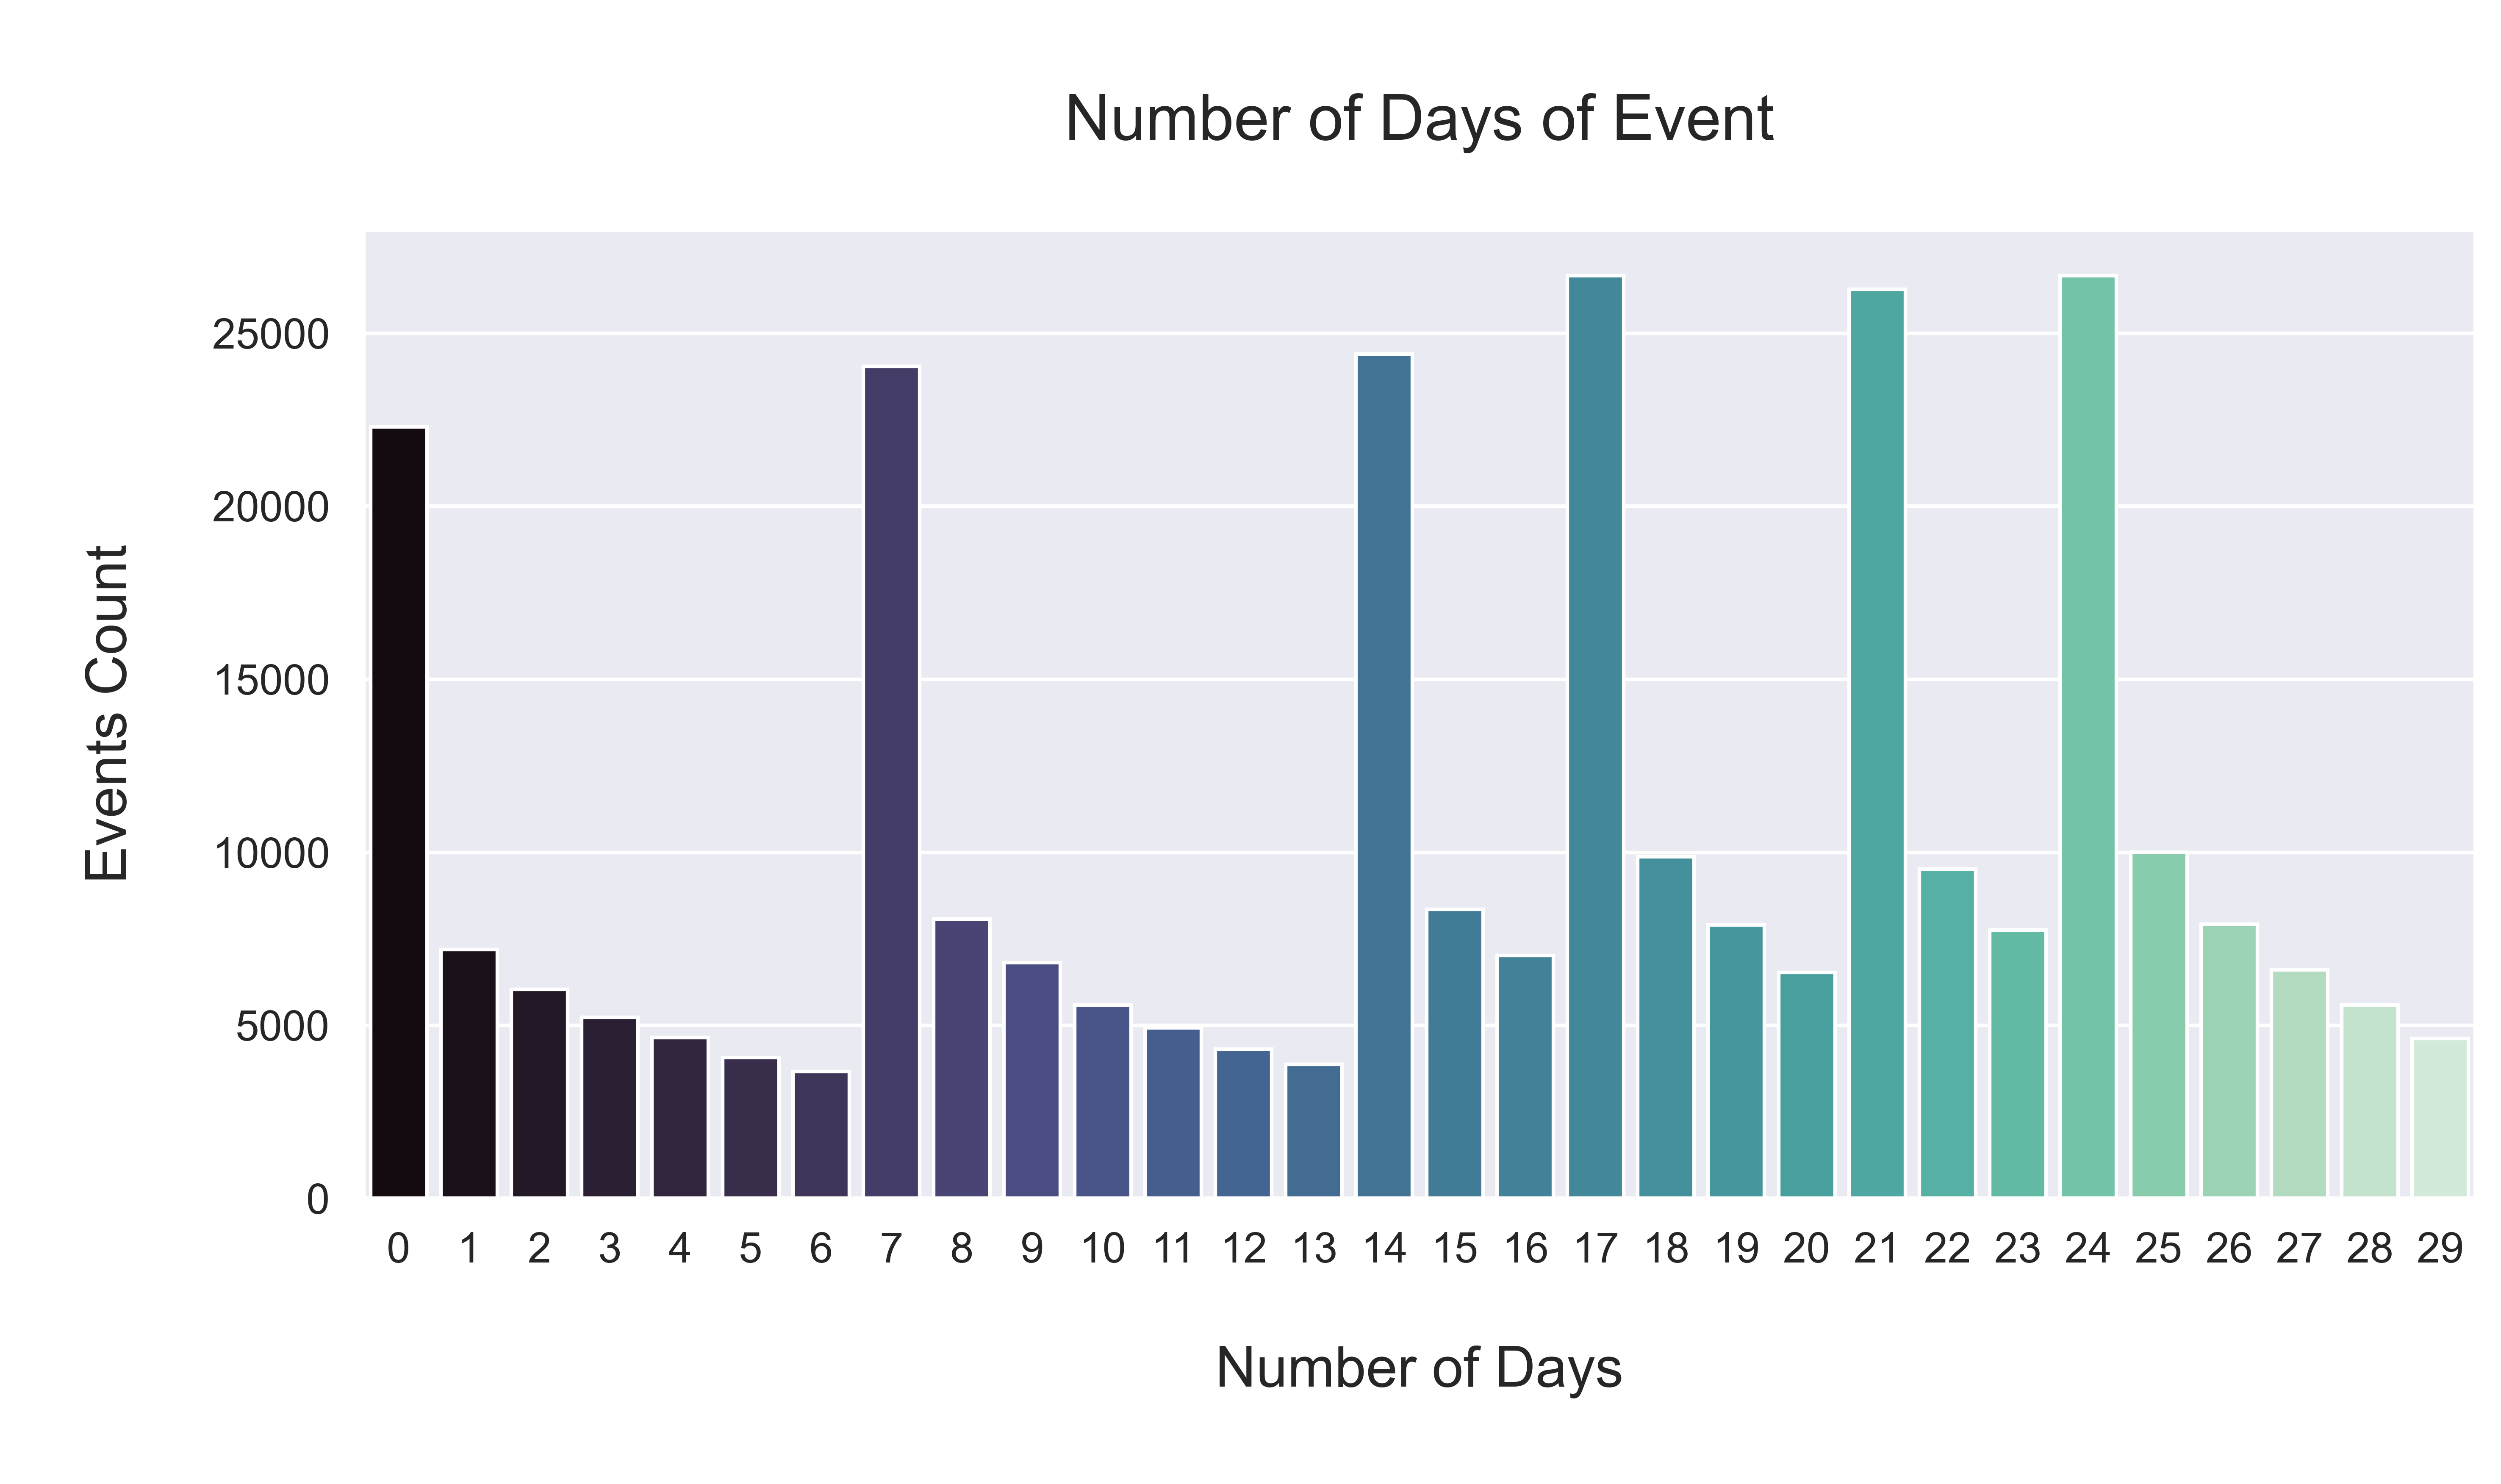

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(data = transcript, 
                   x = 'days_since_start',
                   palette= "mako")

plt.xlabel('\nNumber of Days\n')
plt.ylabel('\nEvents Count\n')
plt.title('\nNumber of Days of Event\n')
plt.tight_layout()

**Event Observations:** <br>
There are 6 days during the month with peaks. These peaks should correspond to when 
*Note: There are 30 days in the graph above (day 0 is day 1)

#### Breaking down timing of events

In [48]:
# Find how many events occurred in each hour
hourly_views = transcript[transcript['event'] == 'offer viewed'].value_counts('hours_since_start').sort_index()
hourly_completed = transcript[transcript['event'] == 'offer completed'].value_counts('hours_since_start').sort_index()
hourly_transactions = transcript[transcript['event'] == 'transaction'].value_counts('hours_since_start').sort_index()

Text(0.5, 1.0, '\nEvents per Hour\n')

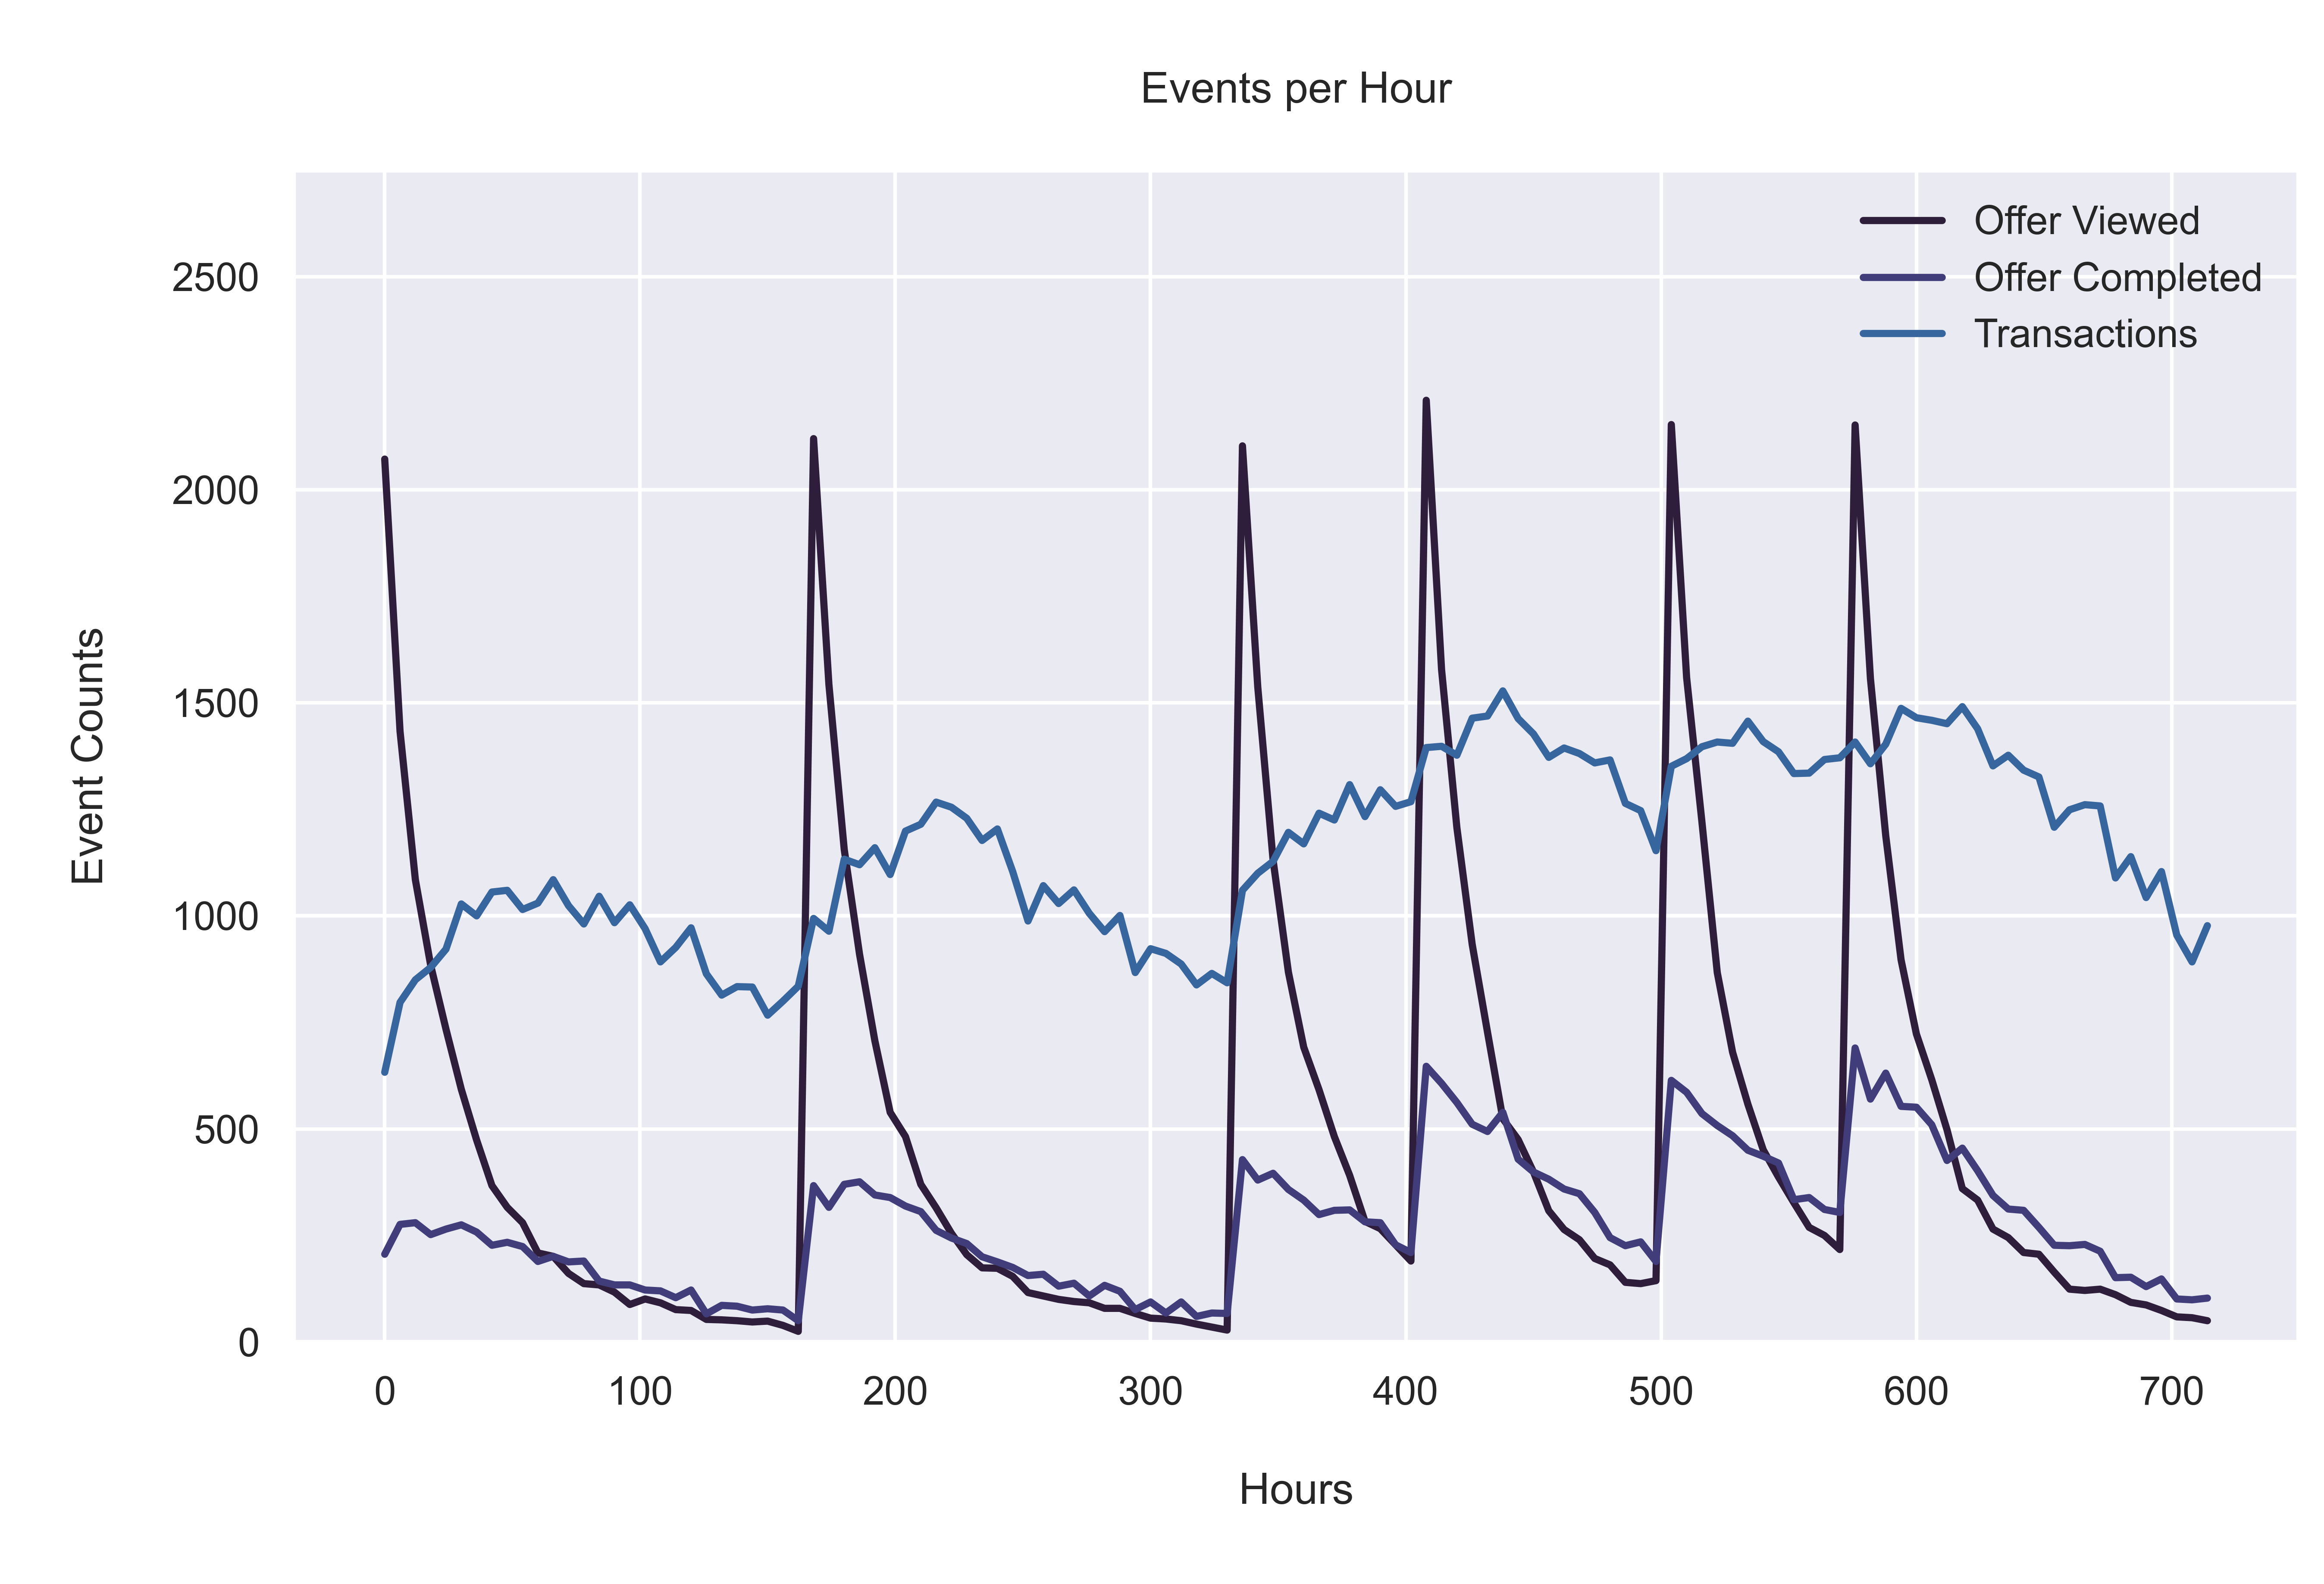

In [49]:
# Hourly visualizuations
plt.style.use('seaborn-darkgrid')
sns.set(palette = ("mako"))
fig, ax = plt.subplots(figsize=(10,6))
hours = hourly_views.index.values

ax.plot(hours, hourly_views, lw = 2, label = 'Offer Viewed')
ax.plot(hours, hourly_completed, lw = 2, label = 'Offer Completed')
ax.plot(hours, hourly_transactions, lw = 2, label = 'Transactions')
ax.set_ylim([0, 2750])

ax.legend(loc = 'upper right')

ax.set_xlabel('\nHours\n')
ax.set_ylabel('\nEvent Counts\n')
ax.set_title('\nEvents per Hour\n')

In [50]:
# Find how many events occurred in each day
daily_received = transcript[transcript['event'] == 'offer received'].value_counts('days_since_start').sort_index()
daily_viewed = transcript[transcript['event'] == 'offer viewed'].value_counts('days_since_start').sort_index()
daily_completed = transcript[transcript['event'] == 'offer completed'].value_counts('days_since_start').sort_index()
daily_transaction = transcript[transcript['event'] == 'transaction'].value_counts('days_since_start').sort_index()

Text(0.5, 1.0, '\nEvents per Day\n')

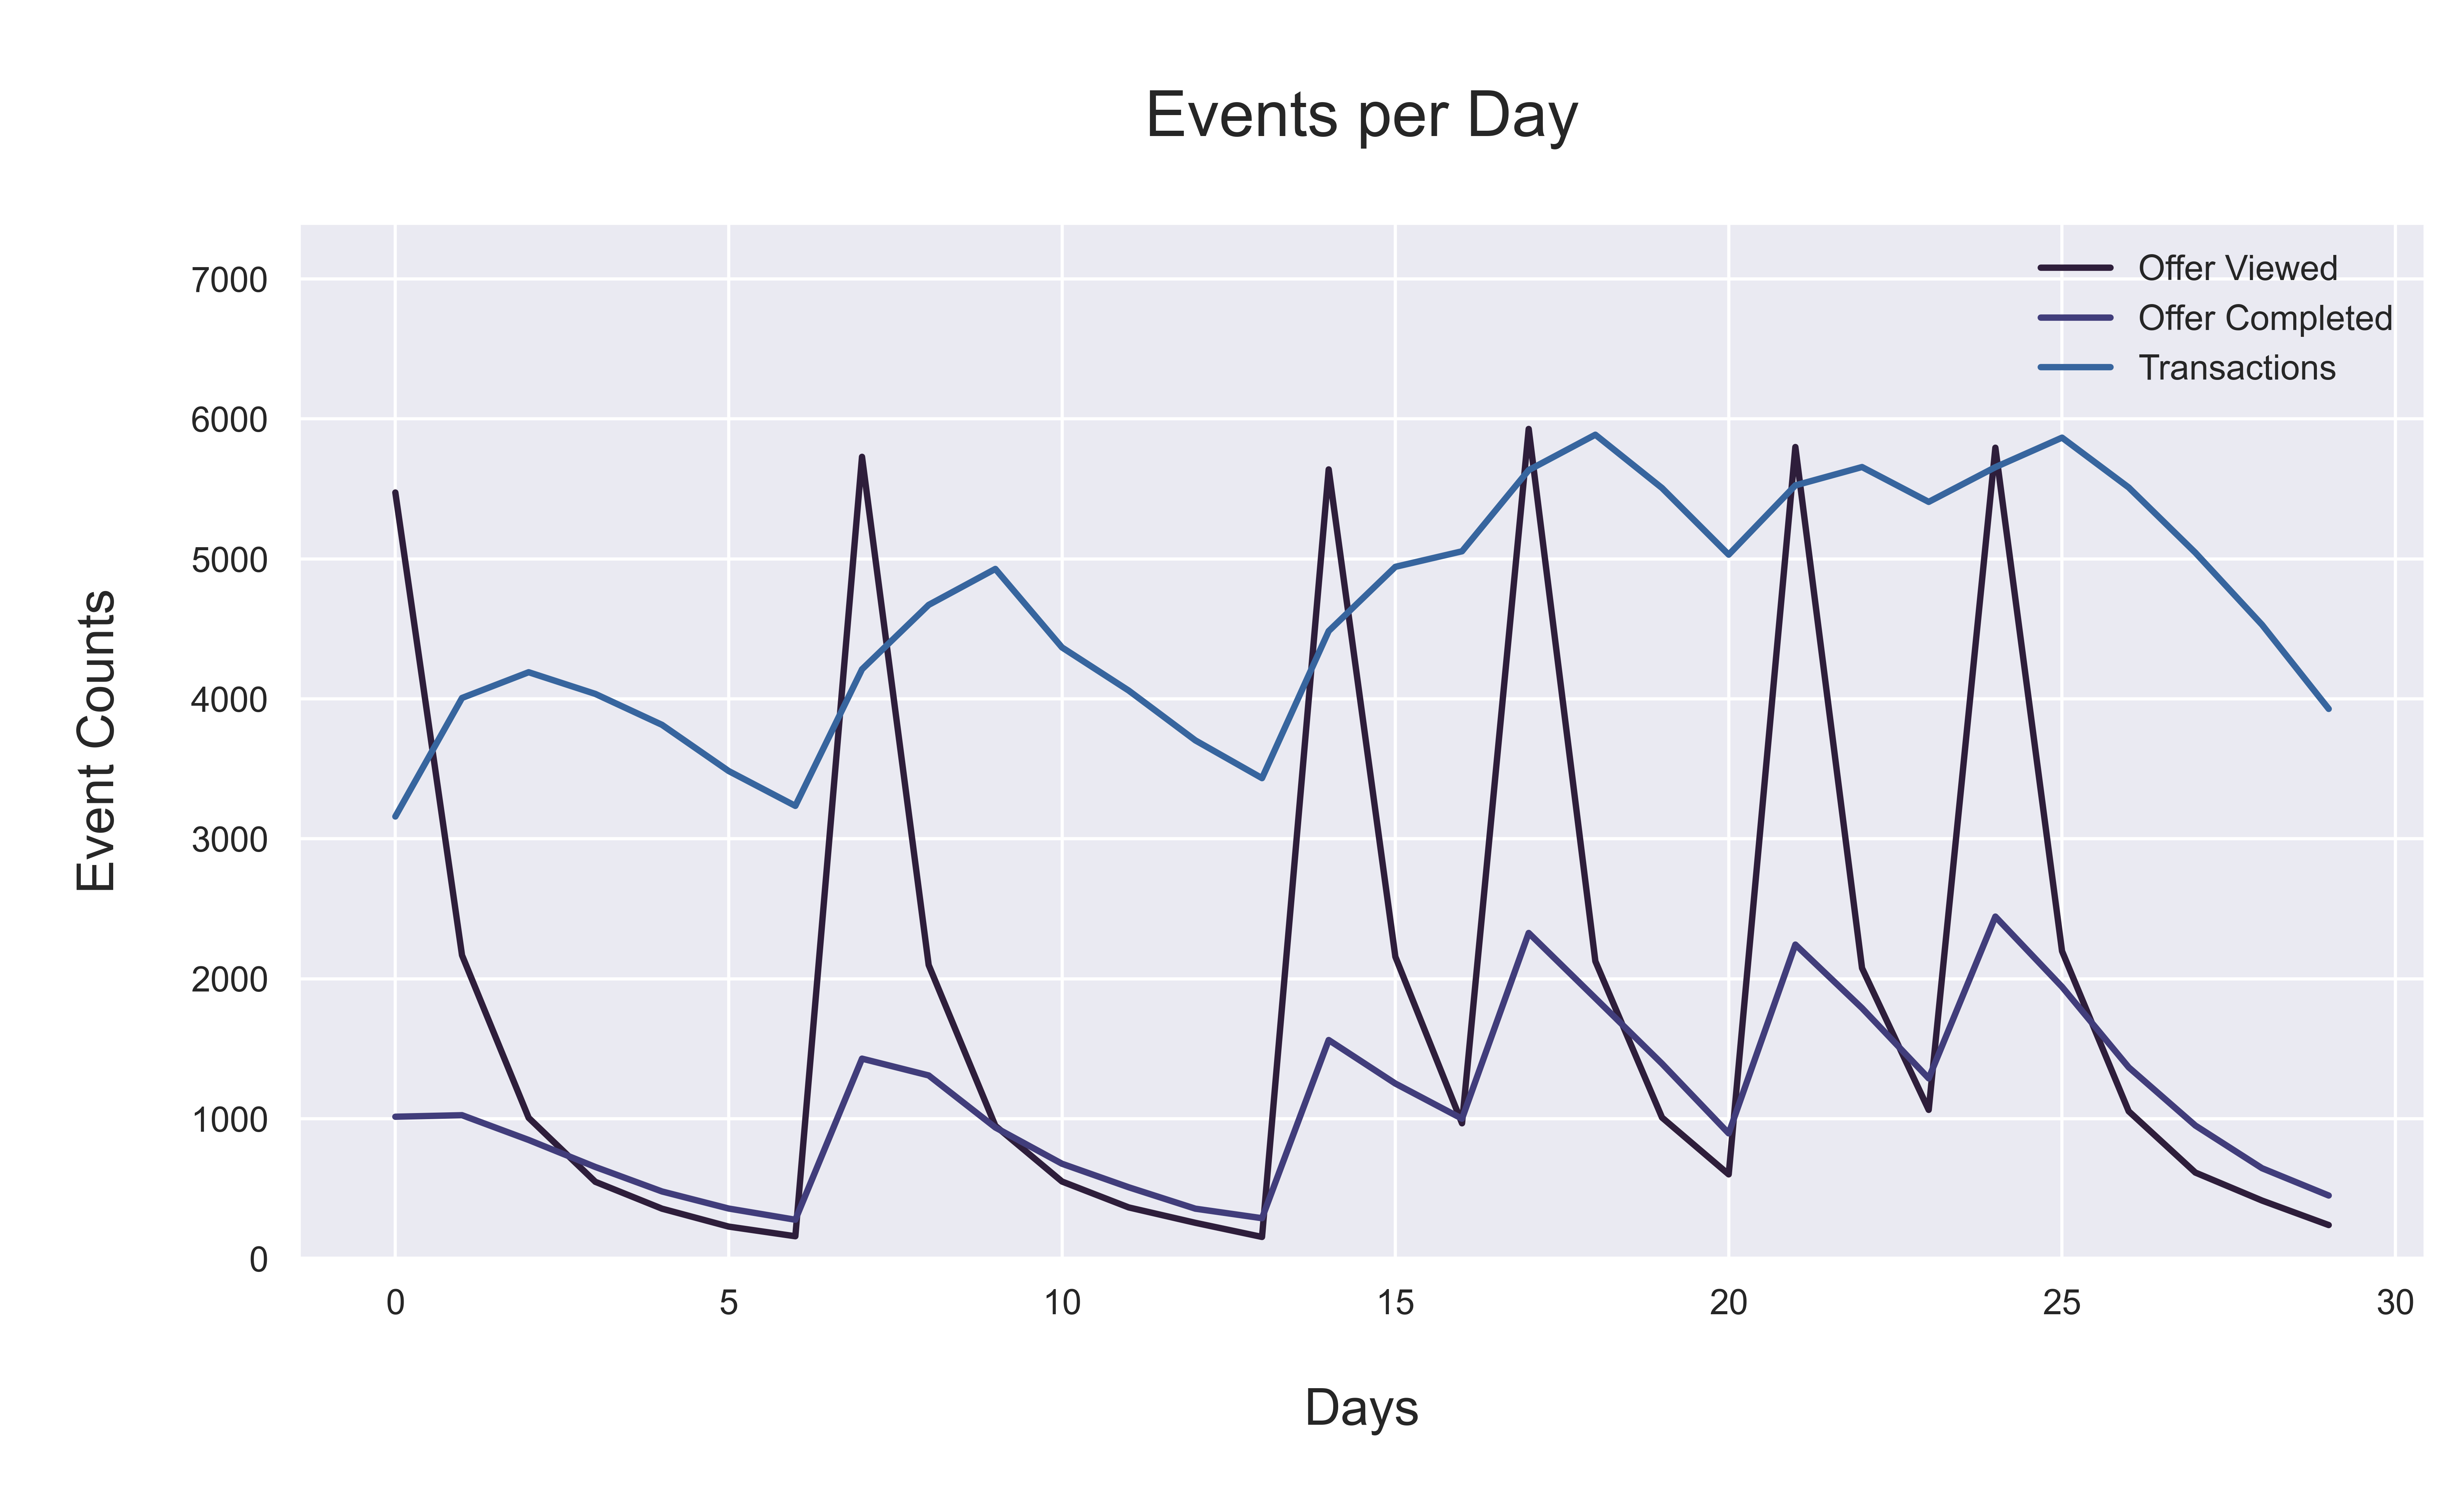

In [51]:
# Daily visualizations
plt.style.use('seaborn-darkgrid')
sns.set(palette = ("mako"))
fig, ax = plt.subplots(figsize=(12,6))
days = np.arange(30)

ax.plot(days, daily_viewed, lw = 2, label = 'Offer Viewed')
ax.plot(days, daily_completed, lw = 2, label = 'Offer Completed')
ax.plot(days, daily_transaction, lw = 2, label = 'Transactions')
ax.set_ylim([0, 7400])

ax.legend(loc = 'upper right')

ax.set_xlabel('\nDays\n', fontsize = 16)
ax.set_ylabel('\nEvent Counts\n', fontsize= 16)
ax.set_title('\nEvents per Day\n', fontsize = 20)

**Events Observations:**
- Completed offers are very predictable based on the pattern of offers viewed. Both the hourly and daily plots show large peaks in offers viewed followed rather quickly by a small peak in offers completed. This suggests that upon viewing the received offer, customers completed/used the offer mostly in a matter of hours. 

- Transactions are correlated to offers received and completed, but the pattern isn't as obvious. On a daily basis, there is as a slight increase in transactions during the offer received peaks. It makes sense that transactions increase when an offere is completed. However, after the peak in completed offers, transactions continue to increase for a few days before declining. This suggests that customers come in because of the offer, but create a "routine" that causes them to continue to come back without offers. 

In [52]:
# Save changes for part 3
offer.to_csv('EDAOffer.csv')
customer.to_csv('EDACustomer.csv')
transcript.to_csv('EDATranscript.csv')